# Telecom Churn Prediction

 > Developers - Muni , Sreedhar K

# Problem Statement

> In the telecommunication industry, customers tend to change operators if not provided with attractive schemes
and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. 
In this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data


# Problem data
<br>
<a href="https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c41/overview">Competition link</a>
</br>
<br>
<a href="https://cdn.upgrad.com/uploads/production/a1e63cc1-7b2a-4d87-886f-fcb90bcda68b/Upgrad+hackathon.pdf">Upgrad Hackathon details</a>
</br>
<br>
<a href="https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c41/data">Dataset</a>
<br>
<br>
Please note that you need to submit only from one account on Kaggle and the team name should be: <br><b>Name_of_member1_Name_of_member2</b>

# Business Objective
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. The given dataset contains customer-level informations for few consecutive months June, July & August they are encoded as 6,7 & 8. The business objective is to predict the cusotmer which will churn in next month by analyzing the dataset
High Value Customers:

One of the primary goal is to identify high value customers which are more likely to churn, as most of the profit comes from high value customers.
Customers which are likely to churn will starting decreasing rhe recharge amount and other facilities. To identify high value customers, total_rech_data can be calculated and total dataser can be filtered which are greater than 70th percentil of the data

 ## Steps:
 
0. [EDA](#EDA)<br>
<ul>
    <li>Load library</li>
    <li>Data Load</li>
    <li>Data Overview</li>
    <li>Metadata Information</li>
</ul>
1. [Data_Cleaning_and_Missing_Data_Analysis](#Data_Cleaning_and_Missing_Data_Analysis)<br>
2. [Outlier Analysis & Treatment Assumption values > Q3+1.5IQR and values < Q1-1.5IQR will be treated](#Outlier_Analysis_and_Treatment_Assumption_values)<br>
3. [Transforming_Categorical_Columns](#Transforming_Categorical_Columns)<br>
<ul>
    <li>Filter High-Value Customers</li>
    <ul>
        <li>calculate total data recharge amount</li>
    </ul>
    <li>Display the correlation matrix again to analyze correlation coefficient between features</li>
</ul>
4. [Univariate_Analysis](#Univariate_Analysis)<br>
5. [Bivariate_Analysis](#Bivariate_Analysis)<br>
6. [Multivariate_Analysis](#Multivariate_Analysis)<br>


> Model Preperation

- Training and Test data split
- Feature Scaling - StandardScaler
- Strategy steps
- Handle Imbalance dataset using SMOTE
- PCA - Dimensionality Reduction
- Case1 : 
- - Split train data into train and test split
- - Created below models using Hyper Parameter Tuning
- - - LOGISTICREGRESSION
- - - RANDOMFOREST
- - - ADABOOST
- - - XGBBOOST
- - - Made predictions by using combination of Random Forest + Adaboost + XGBOOST
- Case2 : 
- - Use entire train dataset for model building using K Cross Validation
- - Created below models on entire train set
- - - RANDOMFOREST
- - - ADABOOST
- - - XGBBOOST
- - - Made predictions by using combination of Random Forest + Adaboost + XGBOOST
- Model Evaluation & Assessment
- Prediction
- - - Made predictions on combination of case1 and case2 
- - - Important Features
- Conclusion & Analysis

<hr>
<hr>

<h1><a id='EDA'>EDA</a><br></h1>
<ul>
    <li>Load library</li>
    <li>Data Load</li>
    <li>Data Overview</li>
    <li>Metadata Information</li>
</ul>


# Load Library

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from IPython.display import display,HTML
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import sensitivity_specificity_support

# Data Load

In [3]:
data = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [4]:
pd.set_option('display.max_columns',500)

In [5]:
pd.set_option('display.max_rows',500)

In [6]:
display(
    data.head(10)
)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [7]:
display(
    data.describe()
)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

# Data Overview

# Metadata Information

In [8]:
display ("Rows     : " ,data.shape[0])
display ("Columns  : " ,data.shape[1])
display ("\nMissing values :  ", data.isnull().sum().values.sum())
display ("\nUnique values :  \n",data.nunique())
display ("\nFeatures : \n" ,data.columns.tolist())

'Rows     : '

69999

'Columns  : '

172

'\nMissing values :  '

1835086

'\nUnique values :  \n'

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

'\nFeatures : \n'

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

<hr>
<h1><a id='Data_Cleaning_and_Missing_Data_Analysis'>Data_Cleaning_and_Missing_Data_Analysis</a><br></h1>
<ul>
    <li>Data_Cleaning</li>
    <li>Missing Data Treatment Analysis Summary</li>
</ul>

In [9]:
## Dropping ID columns since all values are unique
## Dropping circle_id since all columns have value 109

test_v1 = test.drop(columns=['id','circle_id'])
data_v1 = data.drop(columns=['id','circle_id'])

In [10]:
## No of rows which have the all null values

display("No of rows = {} which are having null values in all columns".format(data_v1.isnull().all(axis=1).sum()))

'No of rows = 0 which are having null values in all columns'

In [11]:
## No of colummns which have the all null values

display("No of columns = {} which have null values in all rows".format(data_v1.isnull().all(axis=0).sum()))

'No of columns = 0 which have null values in all rows'

In [12]:
# dropping columns which have null values in all the rows i.e. 100 % Null Values

data_v1.dropna(axis=1, how='all',inplace=True)
test_v1.dropna(axis=1, how='all',inplace=True)

In [13]:
# Check Duplicate Rows - No Duplicate rows found

duplicate = data_v1[data_v1.duplicated()]

display(duplicate)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [14]:
## Dropping columns since these columns have single value only : 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
## 'std_ic_t2o_mou_7','std_ic_t2o_mou_8

test_v1 = test_v1.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

data_v1 = data_v1.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [15]:
display(data_v1.shape)

## We are now having 69999 rows and 161 columns

(69999, 161)

In [16]:
# Percentage of Missing Columns
pd.options.display.max_rows = None # This function is to display all rows
round(100 * data_v1.isnull().sum()/len(data_v1.index),2)

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou

In [17]:
#Segregating categorical , continuous and date columns
cat = []
con = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)

dtcols = cat

cat = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

con = [column for column in con if column not in cat]

display("Numerical Columns" ,len(con),"\nCategorical Columns",len(cat),"\nDate Columns" ,len(dtcols))

'Numerical Columns'

134

'\nCategorical Columns'

18

'\nDate Columns'

9

## Missing Data Treatment Analysis Summary ##

> ### Replacing null values for below categorical variables with -1 considering no recharge has been made
- - 'night_pck_user_6', 'night_pck_user_8', 'night_pck_user_7','monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
- - 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7','monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
- - 'fb_user_6', 'fb_user_7', 'fb_user_8'

> ### Dropping these columns since percentage of missing values are more than 70 %

- - 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7','arpu_2g_8'

> ### Based on the analysis imputing null values in recharge_amount_columns list with 0 considereing no recharge has been made by the customer.
Also we can see that the min value of the recharge amount columns is 1

- - 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'

> ### Imputing Count recharge columns with zero considering no recharge has been made by the customer

- - 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'

> ### Dropping below date columns since it will not be in use much and for other date columns we will be calculating age
- - 'last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8'

> ### Replacing Missing age data with -1 considering no recharge has been made by the user

- - date_of_last_rech_6age date_of_last_rech_7age date_of_last_rech_8age

> ### For other Continuous columns missing values has been replaced with median since we have outliers

In [18]:
# Percentage of Missing Columns
pd.options.display.max_rows = None #(<< This function is use to display all rows >>)
round(100 * data_v1.isnull().sum()/len(data_v1.index),2)

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou

In [19]:
# Replacing null values for below categorical variables with -1 considering no recharge has been made

data_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
data_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
data_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
data_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
data_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
data_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

test_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
test_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
test_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
test_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
test_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
test_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

In [20]:
#Analysing Average revenue Per User data
# Dropping these columns since percentage of missing values are more than 70 %
average_revenue_per_user = data.columns[data.columns.str.contains('arpu_3g|arpu_2g')]

pd.options.display.max_rows = None #(<< This function is use to display all rows >>)
display("Before",round(100 * data_v1[average_revenue_per_user].isnull().sum()/len(data_v1.index),2))

data_v1 = data_v1.drop(columns=average_revenue_per_user,axis=1)

test_v1 = test_v1.drop(columns=average_revenue_per_user,axis=1)


'Before'

arpu_3g_6    74.90
arpu_3g_7    74.48
arpu_3g_8    73.69
arpu_2g_6    74.90
arpu_2g_7    74.48
arpu_2g_8    73.69
dtype: float64

In [21]:
# Handling Missing Values Recharge Columns : 

recharge_amount_columns = data.columns[data.columns.str.contains('av_rech|total_rech_data|max_rech_data|amt_data')]

recharge_amount_columns

# List of recharge columns contain below information and percentage of missing values

# total_rech_data_6           74.90
# total_rech_data_7           74.48
# total_rech_data_8           73.69

# max_rech_data_6             74.90
# max_rech_data_7             74.48
# max_rech_data_8             73.69

# av_rech_amt_data_6          74.90
# av_rech_amt_data_7          74.48
# av_rech_amt_data_8          73.69

display(
    data_v1[recharge_amount_columns].describe()
)

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [22]:
# check - 'total_rech_data_6/7/8' and 'date_of_last_rech_data_6/7/8' both have null values at the same index. 

total_rech_data_6_index = data_v1['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = data_v1['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    display('The indexes for NULL values for month 6 are equal')
    
total_rech_data_7_index = data_v1['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = data_v1['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    display('The indexes for NULL values for month 7 are equal')
    
total_rech_data_8_index = data_v1['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = data_v1['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    display('The indexes for NULL values for month 8 are equal')

'The indexes for NULL values for month 6 are equal'

'The indexes for NULL values for month 7 are equal'

'The indexes for NULL values for month 8 are equal'

- -  Based on the analysis imputing null values in recharge_amount_columns list with 0 considereing no recharge has been made by the customer.
- - Also we can see that the min value of the recharge amount columns is 1 

In [23]:
# Replacing the values with 0 
for column in recharge_amount_columns:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)

# Check % of missing values after the imputation
round(100 * data_v1[recharge_amount_columns].isnull().sum()/len(data_v1.index),2)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [24]:
### Imputing Count recharge columns with zero considering no recharge has been made by the customer

In [25]:
# Replacing the values with 0

count_rech = data_v1.columns[data_v1.columns.str.contains('count_rech')]


for column in count_rech:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)

# Check % of missing values after the imputation
round(100 * data_v1[count_rech].isnull().sum()/len(data_v1.index),2)

count_rech_2g_6    0.0
count_rech_2g_7    0.0
count_rech_2g_8    0.0
count_rech_3g_6    0.0
count_rech_3g_7    0.0
count_rech_3g_8    0.0
dtype: float64

In [26]:
#Dropping below date columns since it will not be in use much and for other date columns we will be calculating age
# 'last_date_of_month_6',
#  'last_date_of_month_7',
#  'last_date_of_month_8'

data_v1 = data_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)
test_v1 = test_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [27]:
dtcols.remove('last_date_of_month_6')
dtcols.remove('last_date_of_month_7')
dtcols.remove('last_date_of_month_8')

In [28]:
test_v1[dtcols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/26/2014,8/24/2014,NaN,NaN,NaN
1,6/19/2014,7/16/2014,8/24/2014,NaN,NaN,NaN
2,6/29/2014,7/27/2014,8/28/2014,NaN,NaN,NaN
3,6/25/2014,7/30/2014,8/24/2014,NaN,NaN,NaN
4,6/29/2014,7/29/2014,8/30/2014,NaN,NaN,NaN


In [29]:
# Handling date columns 
# Replacing Missing age data with -1 considering no recharge has been made by the user

for column in dtcols:
    colstr = column + 'age'
    display(colstr)
    data_v1[column] = pd.to_datetime(data_v1[column])
    data_v1[colstr] = data_v1[column].max() - data_v1[column]
    data_v1[colstr] = data_v1[colstr].dt.days
    data_v1 = data_v1.drop(columns=column,axis=1)
    data_v1[colstr] = data_v1[colstr].fillna(-1)
    

for column in dtcols:
    colstr = column + 'age'
    display(colstr)
    test_v1[column] = pd.to_datetime(test_v1[column])
    test_v1[colstr] = test_v1[column].max() - test_v1[column]
    test_v1[colstr] = test_v1[colstr].dt.days
    test_v1 = test_v1.drop(columns=column,axis=1)
    test_v1[colstr] = test_v1[colstr].fillna(-1)
    

'date_of_last_rech_6age'

'date_of_last_rech_7age'

'date_of_last_rech_8age'

'date_of_last_rech_data_6age'

'date_of_last_rech_data_7age'

'date_of_last_rech_data_8age'

'date_of_last_rech_6age'

'date_of_last_rech_7age'

'date_of_last_rech_8age'

'date_of_last_rech_data_6age'

'date_of_last_rech_data_7age'

'date_of_last_rech_data_8age'

In [30]:
#Segregating cat , con and date columns
cat = []
con = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)

dtcols = cat

cat = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

con = [column for column in con if column not in cat]

display("Numerical Columns" ,len(con),"\nCategorical Columns",len(cat),"\nDate Columns" ,len(dtcols))

'Numerical Columns'

134

'\nCategorical Columns'

18

'\nDate Columns'

0

In [31]:
data_v1[con].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.2382

In [32]:
# Missing Value data treatment onnet_mou
onnet_mou = data_v1.columns[data_v1.columns.str.contains('onnet_mou')]

display(data_v1[onnet_mou].describe())

#Replacing the values with median since we have outliers here

for column in onnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())


,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257
std,299.963093,311.277193,311.896596
min,0.000000,0.000000,0.000000
25%,7.410000,6.675000,6.410000
50%,34.110000,32.280000,32.100000
75%,119.390000,115.837500,115.060000
max,7376.710000,8157.780000,10752.560000


In [33]:
# Missing Value data treatment offnet_mou
offnet_mou = data_v1.columns[data_v1.columns.str.contains('offnet_mou')]

#Replacing the values with median since we have outliers here

for column in offnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())



In [34]:
# Missing Value data treatment roaming
roam_col = data_v1.columns[data_v1.columns.str.contains('roam')]

#Replacing the values with median since we have outliers here

for column in roam_col:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())


In [35]:
# Missing Value data treatment roaming
local_calls = data_v1.columns[data_v1.columns.str.contains('loc')]

#Replacing the values with median since we have outliers here

for column in local_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [36]:
# Missing Value data treatment std
std_calls = data_v1.columns[data_v1.columns.str.contains('std')]

#Replacing the values with median since we have outliers here

for column in std_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [37]:
# Missing Value data treatment std
isd_calls = data_v1.columns[data_v1.columns.str.contains('isd')]

# #Replacing the values with median since we have outliers here

for column in isd_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [38]:
# Missing Value data treatment std
spl_list = data_v1.columns[data_v1.columns.str.contains('spl')]

# #Replacing the values with median since we have outliers here

for column in spl_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [39]:
# Missing Value data treatment std
other_list = data_v1.columns[data_v1.columns.str.contains('other')]

# #Replacing the values with median since we have outliers here

for column in other_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [40]:
display(data_v1.isnull().sum())

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [41]:

display ("Rows     : " ,data_v1.shape[0])
display ("Columns  : " ,data_v1.shape[1])
display ("\nFeatures : \n" ,data_v1.columns.tolist())
display ("\nMissing values :  ", data_v1.isnull().sum().values.sum())
display ("\nUnique values :  \n",data_v1.nunique())

'Rows     : '

69999

'Columns  : '

152

'\nFeatures : \n'

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

'\nMissing values :  '

0

'\nUnique values :  \n'

arpu_6                         61615
arpu_7                         61425
arpu_8                         60194
onnet_mou_6                    20057
onnet_mou_7                    20076
onnet_mou_8                    19726
offnet_mou_6                   26254
offnet_mou_7                   26140
offnet_mou_8                   25996
roam_ic_mou_6                   5306
roam_ic_mou_7                   4240
roam_ic_mou_8                   4252
roam_og_mou_6                   6568
roam_og_mou_7                   5305
roam_og_mou_8                   5215
loc_og_t2t_mou_6               11491
loc_og_t2t_mou_7               11359
loc_og_t2t_mou_8               11296
loc_og_t2m_mou_6               17848
loc_og_t2m_mou_7               17642
loc_og_t2m_mou_8               17617
loc_og_t2f_mou_6                3376
loc_og_t2f_mou_7                3365
loc_og_t2f_mou_8                3311
loc_og_t2c_mou_6                1945
loc_og_t2c_mou_7                2103
loc_og_t2c_mou_8                2204
l

In [42]:
data_v1[con].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.17373

In [43]:
display ("Rows     : " ,test_v1.shape[0])
display ("Columns  : " ,test_v1.shape[1])
display ("\nFeatures : \n" ,test_v1.columns.tolist())
display ("\nMissing values :  ", test_v1.isnull().sum().values.sum())
display ("\nUnique values :  \n",test_v1.nunique())

'Rows     : '

30000

'Columns  : '

151

'\nFeatures : \n'

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

'\nMissing values :  '

0

'\nUnique values :  \n'

arpu_6                         27493
arpu_7                         27406
arpu_8                         26871
onnet_mou_6                    12283
onnet_mou_7                    12176
onnet_mou_8                    12055
offnet_mou_6                   16382
offnet_mou_7                   16152
offnet_mou_8                   16006
roam_ic_mou_6                   3072
roam_ic_mou_7                   2489
roam_ic_mou_8                   2523
roam_og_mou_6                   3661
roam_og_mou_7                   3014
roam_og_mou_8                   2933
loc_og_t2t_mou_6                7707
loc_og_t2t_mou_7                7639
loc_og_t2t_mou_8                7512
loc_og_t2m_mou_6               11835
loc_og_t2m_mou_7               11762
loc_og_t2m_mou_8               11601
loc_og_t2f_mou_6                2325
loc_og_t2f_mou_7                2359
loc_og_t2f_mou_8                2302
loc_og_t2c_mou_6                1403
loc_og_t2c_mou_7                1540
loc_og_t2c_mou_8                1557
l

<hr>
<h1><a id='Outlier_Analysis_and_Treatment_Assumption_values'>Data Cleaning - Outlier Analysis</a><br></h1>

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
col = ['churn_probability','date_of_last_rech_data_6age', 'date_of_last_rech_data_7age', 'date_of_last_rech_8age', 'date_of_last_rech_6age', 'date_of_last_rech_data_8age', 'date_of_last_rech_7age']

for i in col:
    con.remove(i)

In [46]:
# Outlier Analysis

outliers = []
out_cols = con
out_summary = []

for i in out_cols:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    if ((data_v1[i].min() < lower_bound) or (data_v1[i].max() > upper_bound)):
        out_summary.append("attribute \"{}\" with min value : {} -> max value : {} -> IQR {} -> lower_bound : {} match is {} -> upper_bound : {} match is {}".format(i,data_v1[i].min(),data_v1[i].max(),IQR,Q1-1.5*IQR,(data_v1[i].min() < lower_bound),Q3+1.5*IQR,data_v1[i].max() > upper_bound))
        outliers.append(i)


# List of outliers satisfying lower or upper bound        
for i in range(0,len(out_summary)):
    display("\nOutlier column with stats : \n\n{}\n".format(out_summary[i]))
    

#Outliers Treatment

for i in outliers:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    data_v1[i][data_v1[i]<=lower_bound] = lower_bound
    data_v1[i][data_v1[i]>=upper_bound] = upper_bound
    test_v1[i][test_v1[i]<=lower_bound] = lower_bound
    test_v1[i][test_v1[i]>=upper_bound] = upper_bound

display(outliers)

display("After outliers treatment\n\n",data_v1[out_cols].describe())

'\nOutlier column with stats : \n\nattribute "arpu_6" with min value : -2258.709 -> max value : 27731.088 -> IQR 830.5226999999998 -> lower_bound : -1244.2840499999998 match is True -> upper_bound : 2077.8067499999997 match is True\n'

'\nOutlier column with stats : \n\nattribute "arpu_7" with min value : -1289.715 -> max value : 35145.834 -> IQR 822.3176999999982 -> lower_bound : -1232.5575499999973 match is True -> upper_bound : 2056.7132499999957 match is True\n'

'\nOutlier column with stats : \n\nattribute "arpu_8" with min value : -945.808 -> max value : 33543.624 -> IQR 828.4646999999983 -> lower_bound : -1242.6970499999975 match is False -> upper_bound : 2071.1617499999957 match is True\n'

'\nOutlier column with stats : \n\nattribute "onnet_mou_6" with min value : 0.0 -> max value : 7376.71 -> IQR 598.5999999999991 -> lower_bound : -897.8999999999987 match is False -> upper_bound : 1496.4999999999977 match is True\n'

'\nOutlier column with stats : \n\nattribute "onnet_mou_7" with min value : 0.0 -> max value : 8157.78 -> IQR 608.8779999999985 -> lower_bound : -913.3169999999977 match is False -> upper_bound : 1522.194999999996 match is True\n'

'\nOutlier column with stats : \n\nattribute "onnet_mou_8" with min value : 0.0 -> max value : 10752.56 -> IQR 596.1249999999987 -> lower_bound : -894.1874999999982 match is False -> upper_bound : 1490.3124999999968 match is True\n'

'\nOutlier column with stats : \n\nattribute "offnet_mou_6" with min value : 0.0 -> max value : 8362.36 -> IQR 718.539999999999 -> lower_bound : -1076.8499999999985 match is False -> upper_bound : 1797.3099999999977 match is True\n'

'\nOutlier column with stats : \n\nattribute "offnet_mou_7" with min value : 0.0 -> max value : 7043.98 -> IQR 730.841999999999 -> lower_bound : -1095.5029999999986 match is False -> upper_bound : 1827.8649999999975 match is True\n'

'\nOutlier column with stats : \n\nattribute "offnet_mou_8" with min value : 0.0 -> max value : 14007.34 -> IQR 715.4549999999995 -> lower_bound : -1072.7224999999992 match is False -> upper_bound : 1789.0974999999987 match is True\n'

'\nOutlier column with stats : \n\nattribute "roam_ic_mou_6" with min value : 0.0 -> max value : 2850.98 -> IQR 38.84199999999983 -> lower_bound : -58.26299999999974 match is False -> upper_bound : 97.10499999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "roam_ic_mou_7" with min value : 0.0 -> max value : 4155.83 -> IQR 21.561999999999824 -> lower_bound : -32.34299999999973 match is False -> upper_bound : 53.90499999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "roam_ic_mou_8" with min value : 0.0 -> max value : 4169.81 -> IQR 21.991999999999823 -> lower_bound : -32.98799999999974 match is False -> upper_bound : 54.97999999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "roam_og_mou_6" with min value : 0.0 -> max value : 3775.11 -> IQR 65.93099999999991 -> lower_bound : -98.89649999999986 match is False -> upper_bound : 164.82749999999976 match is True\n'

'\nOutlier column with stats : \n\nattribute "roam_og_mou_7" with min value : 0.0 -> max value : 2812.04 -> IQR 40.18499999999956 -> lower_bound : -60.27749999999934 match is False -> upper_bound : 100.4624999999989 match is True\n'

'\nOutlier column with stats : \n\nattribute "roam_og_mou_8" with min value : 0.0 -> max value : 5337.04 -> IQR 38.84199999999983 -> lower_bound : -58.26299999999974 match is False -> upper_bound : 97.10499999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2t_mou_6" with min value : 0.0 -> max value : 6431.33 -> IQR 172.23 -> lower_bound : -258.34499999999997 match is False -> upper_bound : 430.57499999999993 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2t_mou_7" with min value : 0.0 -> max value : 7400.66 -> IQR 169.39199999999983 -> lower_bound : -254.08799999999974 match is False -> upper_bound : 423.47999999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2t_mou_8" with min value : 0.0 -> max value : 10752.56 -> IQR 167.63599999999948 -> lower_bound : -251.4539999999992 match is False -> upper_bound : 419.08999999999867 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2m_mou_6" with min value : 0.0 -> max value : 4696.83 -> IQR 348.72199999999896 -> lower_bound : -523.0829999999985 match is False -> upper_bound : 871.8049999999974 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2m_mou_7" with min value : 0.0 -> max value : 4557.14 -> IQR 340.35199999999895 -> lower_bound : -510.5279999999984 match is False -> upper_bound : 850.8799999999974 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2m_mou_8" with min value : 0.0 -> max value : 4961.33 -> IQR 337.5309999999999 -> lower_bound : -506.2964999999998 match is False -> upper_bound : 843.8274999999996 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2f_mou_6" with min value : 0.0 -> max value : 617.58 -> IQR 18.16 -> lower_bound : -27.240000000000002 match is False -> upper_bound : 45.400000000000006 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2f_mou_7" with min value : 0.0 -> max value : 815.33 -> IQR 18.46 -> lower_bound : -27.69 match is False -> upper_bound : 46.150000000000006 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2f_mou_8" with min value : 0.0 -> max value : 588.29 -> IQR 17.340999999999912 -> lower_bound : -26.01149999999987 match is False -> upper_bound : 43.35249999999978 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2c_mou_6" with min value : 0.0 -> max value : 342.86 -> IQR 6.13 -> lower_bound : -9.195 match is False -> upper_bound : 15.325 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2c_mou_7" with min value : 0.0 -> max value : 916.24 -> IQR 7.06 -> lower_bound : -10.59 match is False -> upper_bound : 17.65 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_t2c_mou_8" with min value : 0.0 -> max value : 351.83 -> IQR 7.49 -> lower_bound : -11.235 match is False -> upper_bound : 18.725 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_mou_6" with min value : 0.0 -> max value : 10643.38 -> IQR 527.9179999999993 -> lower_bound : -791.876999999999 match is False -> upper_bound : 1319.7949999999983 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_mou_7" with min value : 0.0 -> max value : 7674.78 -> IQR 517.9419999999999 -> lower_bound : -776.9129999999998 match is False -> upper_bound : 1294.8549999999996 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_og_mou_8" with min value : 0.0 -> max value : 11039.91 -> IQR 513.2359999999995 -> lower_bound : -769.8539999999994 match is False -> upper_bound : 1283.0899999999988 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2t_mou_6" with min value : 0.0 -> max value : 7366.58 -> IQR 448.4859999999995 -> lower_bound : -672.7289999999992 match is False -> upper_bound : 1121.2149999999988 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2t_mou_7" with min value : 0.0 -> max value : 8133.66 -> IQR 481.4769999999985 -> lower_bound : -722.2154999999977 match is False -> upper_bound : 1203.6924999999962 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2t_mou_8" with min value : 0.0 -> max value : 8014.43 -> IQR 466.44299999999885 -> lower_bound : -699.6644999999983 match is False -> upper_bound : 1166.1074999999971 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2m_mou_6" with min value : 0.0 -> max value : 8314.76 -> IQR 448.6809999999999 -> lower_bound : -673.0214999999998 match is False -> upper_bound : 1121.7024999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2m_mou_7" with min value : 0.0 -> max value : 6622.54 -> IQR 469.36 -> lower_bound : -704.04 match is False -> upper_bound : 1173.4 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2m_mou_8" with min value : 0.0 -> max value : 13950.04 -> IQR 466.1809999999999 -> lower_bound : -699.2714999999998 match is False -> upper_bound : 1165.4524999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2f_mou_6" with min value : 0.0 -> max value : 628.56 -> IQR 4.06 -> lower_bound : -6.09 match is False -> upper_bound : 10.149999999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2f_mou_7" with min value : 0.0 -> max value : 465.79 -> IQR 3.61 -> lower_bound : -5.415 match is False -> upper_bound : 9.025 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_t2f_mou_8" with min value : 0.0 -> max value : 354.16 -> IQR 3.5 -> lower_bound : -5.25 match is False -> upper_bound : 8.75 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_mou_6" with min value : 0.0 -> max value : 8432.99 -> IQR 865.0829999999997 -> lower_bound : -1297.6244999999997 match is False -> upper_bound : 2162.7074999999995 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_mou_7" with min value : 0.0 -> max value : 8155.53 -> IQR 903.5829999999997 -> lower_bound : -1355.3744999999997 match is False -> upper_bound : 2258.9574999999995 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_og_mou_8" with min value : 0.0 -> max value : 13980.06 -> IQR 893.8969999999994 -> lower_bound : -1340.845499999999 match is False -> upper_bound : 2234.7424999999985 match is True\n'

'\nOutlier column with stats : \n\nattribute "isd_og_mou_6" with min value : 0.0 -> max value : 5900.66 -> IQR 0.0 -> lower_bound : 0.0 match is False -> upper_bound : 0.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "isd_og_mou_7" with min value : 0.0 -> max value : 5490.28 -> IQR 0.0 -> lower_bound : 0.0 match is False -> upper_bound : 0.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "isd_og_mou_8" with min value : 0.0 -> max value : 5681.54 -> IQR 0.0 -> lower_bound : 0.0 match is False -> upper_bound : 0.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "spl_og_mou_6" with min value : 0.0 -> max value : 1023.21 -> IQR 18.93 -> lower_bound : -28.395 match is False -> upper_bound : 47.325 match is True\n'

'\nOutlier column with stats : \n\nattribute "spl_og_mou_7" with min value : 0.0 -> max value : 2372.51 -> IQR 22.71 -> lower_bound : -34.065 match is False -> upper_bound : 56.775 match is True\n'

'\nOutlier column with stats : \n\nattribute "spl_og_mou_8" with min value : 0.0 -> max value : 1075.08 -> IQR 22.95099999999991 -> lower_bound : -34.42649999999987 match is False -> upper_bound : 57.377499999999785 match is True\n'

'\nOutlier column with stats : \n\nattribute "og_others_6" with min value : 0.0 -> max value : 800.89 -> IQR 2.61 -> lower_bound : -3.915 match is False -> upper_bound : 6.525 match is True\n'

'\nOutlier column with stats : \n\nattribute "og_others_7" with min value : 0.0 -> max value : 270.24 -> IQR 0.0 -> lower_bound : 0.0 match is False -> upper_bound : 0.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "og_others_8" with min value : 0.0 -> max value : 394.93 -> IQR 0.0 -> lower_bound : 0.0 match is False -> upper_bound : 0.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_og_mou_6" with min value : 0.0 -> max value : 10674.03 -> IQR 1171.1879999999994 -> lower_bound : -1756.7819999999992 match is False -> upper_bound : 2927.9699999999984 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_og_mou_7" with min value : 0.0 -> max value : 8285.64 -> IQR 1193.256999999996 -> lower_bound : -1789.885499999994 match is False -> upper_bound : 2983.14249999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_og_mou_8" with min value : 0.0 -> max value : 14043.06 -> IQR 1174.5519999999963 -> lower_bound : -1761.8279999999945 match is False -> upper_bound : 2936.379999999991 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2t_mou_6" with min value : 0.0 -> max value : 5315.59 -> IQR 169.07299999999887 -> lower_bound : -253.60949999999832 match is False -> upper_bound : 422.68249999999716 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2t_mou_7" with min value : 0.0 -> max value : 9324.66 -> IQR 169.04 -> lower_bound : -253.56 match is False -> upper_bound : 422.6 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2t_mou_8" with min value : 0.0 -> max value : 10696.23 -> IQR 164.94899999999922 -> lower_bound : -247.42349999999882 match is False -> upper_bound : 412.372499999998 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2m_mou_6" with min value : 0.0 -> max value : 4450.74 -> IQR 363.91199999999986 -> lower_bound : -545.8679999999998 match is False -> upper_bound : 909.7799999999997 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2m_mou_7" with min value : 0.0 -> max value : 4455.83 -> IQR 358.1309999999999 -> lower_bound : -537.1964999999999 match is False -> upper_bound : 895.3274999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2m_mou_8" with min value : 0.0 -> max value : 6274.19 -> IQR 361.6309999999999 -> lower_bound : -542.4464999999999 match is False -> upper_bound : 904.0774999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2f_mou_6" with min value : 0.0 -> max value : 1872.34 -> IQR 54.94 -> lower_bound : -82.41 match is False -> upper_bound : 137.35 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2f_mou_7" with min value : 0.0 -> max value : 1983.01 -> IQR 56.91199999999982 -> lower_bound : -85.36799999999974 match is False -> upper_bound : 142.27999999999957 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_t2f_mou_8" with min value : 0.0 -> max value : 1676.58 -> IQR 53.04 -> lower_bound : -79.56 match is False -> upper_bound : 132.6 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_mou_6" with min value : 0.0 -> max value : 7454.63 -> IQR 557.1219999999989 -> lower_bound : -835.6829999999984 match is False -> upper_bound : 1392.8049999999973 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_mou_7" with min value : 0.0 -> max value : 9669.91 -> IQR 551.6139999999997 -> lower_bound : -827.0719999999995 match is False -> upper_bound : 1379.3839999999993 match is True\n'

'\nOutlier column with stats : \n\nattribute "loc_ic_mou_8" with min value : 0.0 -> max value : 10830.16 -> IQR 552.3899999999974 -> lower_bound : -828.0849999999961 match is False -> upper_bound : 1381.4749999999935 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2t_mou_6" with min value : 0.0 -> max value : 3336.38 -> IQR 39.49199999999983 -> lower_bound : -59.237999999999744 match is False -> upper_bound : 98.72999999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2t_mou_7" with min value : 0.0 -> max value : 4708.71 -> IQR 40.44199999999982 -> lower_bound : -60.662999999999734 match is False -> upper_bound : 101.10499999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2t_mou_8" with min value : 0.0 -> max value : 3930.24 -> IQR 40.08 -> lower_bound : -60.12 match is False -> upper_bound : 100.19999999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2m_mou_6" with min value : 0.0 -> max value : 5647.16 -> IQR 83.98 -> lower_bound : -125.97 match is False -> upper_bound : 209.95 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2m_mou_7" with min value : 0.0 -> max value : 6141.88 -> IQR 87.38099999999991 -> lower_bound : -131.07149999999987 match is False -> upper_bound : 218.4524999999998 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2m_mou_8" with min value : 0.0 -> max value : 5512.76 -> IQR 84.86 -> lower_bound : -127.28999999999999 match is False -> upper_bound : 212.14999999999998 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2f_mou_6" with min value : 0.0 -> max value : 1351.11 -> IQR 8.061999999999825 -> lower_bound : -12.092999999999737 match is False -> upper_bound : 20.15499999999956 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2f_mou_7" with min value : 0.0 -> max value : 1136.08 -> IQR 8.13 -> lower_bound : -12.195 match is False -> upper_bound : 20.325000000000003 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_t2f_mou_8" with min value : 0.0 -> max value : 1394.89 -> IQR 7.65 -> lower_bound : -11.475000000000001 match is False -> upper_bound : 19.125 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_mou_6" with min value : 0.0 -> max value : 5712.11 -> IQR 128.84699999999938 -> lower_bound : -193.27049999999906 match is False -> upper_bound : 322.1174999999985 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_mou_7" with min value : 0.0 -> max value : 6745.76 -> IQR 134.88 -> lower_bound : -202.32 match is False -> upper_bound : 337.2 match is True\n'

'\nOutlier column with stats : \n\nattribute "std_ic_mou_8" with min value : 0.0 -> max value : 5658.74 -> IQR 130.59 -> lower_bound : -195.885 match is False -> upper_bound : 326.475 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_ic_mou_6" with min value : 0.0 -> max value : 7716.14 -> IQR 668.2399999999991 -> lower_bound : -1002.3599999999986 match is False -> upper_bound : 1670.5999999999976 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_ic_mou_7" with min value : 0.0 -> max value : 9699.01 -> IQR 676.9039999999944 -> lower_bound : -1015.3559999999916 match is False -> upper_bound : 1692.2599999999861 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_ic_mou_8" with min value : 0.0 -> max value : 10830.38 -> IQR 665.4349999999995 -> lower_bound : -998.1524999999992 match is False -> upper_bound : 1663.5874999999987 match is True\n'

'\nOutlier column with stats : \n\nattribute "spl_ic_mou_6" with min value : 0.0 -> max value : 19.76 -> IQR 0.41 -> lower_bound : -0.615 match is False -> upper_bound : 1.025 match is True\n'

'\nOutlier column with stats : \n\nattribute "spl_ic_mou_7" with min value : 0.0 -> max value : 13.46 -> IQR 0.23 -> lower_bound : -0.34500000000000003 match is False -> upper_bound : 0.5750000000000001 match is True\n'

'\nOutlier column with stats : \n\nattribute "spl_ic_mou_8" with min value : 0.0 -> max value : 16.86 -> IQR 0.3 -> lower_bound : -0.44999999999999996 match is False -> upper_bound : 0.75 match is True\n'

'\nOutlier column with stats : \n\nattribute "isd_ic_mou_6" with min value : 0.0 -> max value : 6789.41 -> IQR 22.64 -> lower_bound : -33.96 match is False -> upper_bound : 56.6 match is True\n'

'\nOutlier column with stats : \n\nattribute "isd_ic_mou_7" with min value : 0.0 -> max value : 5289.54 -> IQR 26.59399999999965 -> lower_bound : -39.89099999999947 match is False -> upper_bound : 66.48499999999912 match is True\n'

'\nOutlier column with stats : \n\nattribute "isd_ic_mou_8" with min value : 0.0 -> max value : 4127.01 -> IQR 27.212999999999738 -> lower_bound : -40.81949999999961 match is False -> upper_bound : 68.03249999999935 match is True\n'

'\nOutlier column with stats : \n\nattribute "ic_others_6" with min value : 0.0 -> max value : 1362.94 -> IQR 2.0 -> lower_bound : -3.0 match is False -> upper_bound : 5.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "ic_others_7" with min value : 0.0 -> max value : 1495.94 -> IQR 2.48 -> lower_bound : -3.7199999999999998 match is False -> upper_bound : 6.199999999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "ic_others_8" with min value : 0.0 -> max value : 1209.86 -> IQR 2.23 -> lower_bound : -3.3449999999999998 match is False -> upper_bound : 5.574999999999999 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_num_6" with min value : 0 -> max value : 170 -> IQR 19.0 -> lower_bound : -27.5 match is False -> upper_bound : 48.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_num_7" with min value : 0 -> max value : 138 -> IQR 20.0 -> lower_bound : -29.0 match is False -> upper_bound : 51.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_num_8" with min value : 0 -> max value : 138 -> IQR 19.0 -> lower_bound : -27.5 match is False -> upper_bound : 48.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_amt_6" with min value : 0 -> max value : 35190 -> IQR 998.0 -> lower_bound : -1497.0 match is False -> upper_bound : 2495.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_amt_7" with min value : 0 -> max value : 40335 -> IQR 986.0999999999913 -> lower_bound : -1479.149999999987 match is False -> upper_bound : 2465.249999999978 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_amt_8" with min value : 0 -> max value : 45320 -> IQR 988.0 -> lower_bound : -1482.0 match is False -> upper_bound : 2470.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "max_rech_amt_6" with min value : 0 -> max value : 4010 -> IQR 252.0 -> lower_bound : -378.0 match is False -> upper_bound : 630.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "max_rech_amt_7" with min value : 0 -> max value : 3299 -> IQR 252.0 -> lower_bound : -378.0 match is False -> upper_bound : 630.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "max_rech_amt_8" with min value : 0 -> max value : 4449 -> IQR 252.0 -> lower_bound : -378.0 match is False -> upper_bound : 630.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "last_day_rch_amt_6" with min value : 0 -> max value : 4010 -> IQR 200.0 -> lower_bound : -300.0 match is False -> upper_bound : 500.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "last_day_rch_amt_7" with min value : 0 -> max value : 3100 -> IQR 200.0 -> lower_bound : -300.0 match is False -> upper_bound : 500.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "last_day_rch_amt_8" with min value : 0 -> max value : 4449 -> IQR 225.0 -> lower_bound : -337.5 match is False -> upper_bound : 562.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_data_6" with min value : 0.0 -> max value : 61.0 -> IQR 3.0 -> lower_bound : -4.5 match is False -> upper_bound : 7.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_data_7" with min value : 0.0 -> max value : 54.0 -> IQR 4.0 -> lower_bound : -6.0 match is False -> upper_bound : 10.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "total_rech_data_8" with min value : 0.0 -> max value : 60.0 -> IQR 4.0 -> lower_bound : -6.0 match is False -> upper_bound : 10.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "max_rech_data_6" with min value : 0.0 -> max value : 1555.0 -> IQR 198.0 -> lower_bound : -297.0 match is False -> upper_bound : 495.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "max_rech_data_7" with min value : 0.0 -> max value : 1555.0 -> IQR 198.0 -> lower_bound : -297.0 match is False -> upper_bound : 495.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "max_rech_data_8" with min value : 0.0 -> max value : 1555.0 -> IQR 198.0 -> lower_bound : -297.0 match is False -> upper_bound : 495.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "count_rech_2g_6" with min value : 0.0 -> max value : 42.0 -> IQR 3.0 -> lower_bound : -4.5 match is False -> upper_bound : 7.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "count_rech_2g_7" with min value : 0.0 -> max value : 48.0 -> IQR 3.0 -> lower_bound : -4.5 match is False -> upper_bound : 7.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "count_rech_2g_8" with min value : 0.0 -> max value : 44.0 -> IQR 3.0 -> lower_bound : -4.5 match is False -> upper_bound : 7.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "count_rech_3g_6" with min value : 0.0 -> max value : 29.0 -> IQR 1.0 -> lower_bound : -1.5 match is False -> upper_bound : 2.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "count_rech_3g_7" with min value : 0.0 -> max value : 34.0 -> IQR 1.0 -> lower_bound : -1.5 match is False -> upper_bound : 2.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "count_rech_3g_8" with min value : 0.0 -> max value : 45.0 -> IQR 1.0 -> lower_bound : -1.5 match is False -> upper_bound : 2.5 match is True\n'

'\nOutlier column with stats : \n\nattribute "av_rech_amt_data_6" with min value : 0.0 -> max value : 5920.0 -> IQR 256.0 -> lower_bound : -384.0 match is False -> upper_bound : 640.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "av_rech_amt_data_7" with min value : 0.0 -> max value : 4365.0 -> IQR 274.0 -> lower_bound : -411.0 match is False -> upper_bound : 685.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "av_rech_amt_data_8" with min value : 0.0 -> max value : 4076.0 -> IQR 274.0 -> lower_bound : -411.0 match is False -> upper_bound : 685.0 match is True\n'

'\nOutlier column with stats : \n\nattribute "vol_2g_mb_6" with min value : 0.0 -> max value : 10285.9 -> IQR 327.24099999999993 -> lower_bound : -490.86149999999986 match is False -> upper_bound : 818.1024999999997 match is True\n'

'\nOutlier column with stats : \n\nattribute "vol_2g_mb_7" with min value : 0.0 -> max value : 7873.55 -> IQR 318.67199999999985 -> lower_bound : -478.0079999999998 match is False -> upper_bound : 796.6799999999996 match is True\n'

'\nOutlier column with stats : \n\nattribute "vol_2g_mb_8" with min value : 0.0 -> max value : 11117.61 -> IQR 302.28399999999965 -> lower_bound : -453.4259999999995 match is False -> upper_bound : 755.7099999999991 match is True\n'

'\nOutlier column with stats : \n\nattribute "vol_3g_mb_6" with min value : 0.0 -> max value : 45735.4 -> IQR 831.1889999999983 -> lower_bound : -1246.7834999999973 match is False -> upper_bound : 2077.9724999999953 match is True\n'

'\nOutlier column with stats : \n\nattribute "vol_3g_mb_7" with min value : 0.0 -> max value : 28144.12 -> IQR 866.4639999999988 -> lower_bound : -1299.695999999998 match is False -> upper_bound : 2166.159999999997 match is True\n'

'\nOutlier column with stats : \n\nattribute "vol_3g_mb_8" with min value : 0.0 -> max value : 30036.06 -> IQR 899.0729999999979 -> lower_bound : -1348.6094999999968 match is False -> upper_bound : 2247.682499999995 match is True\n'

'\nOutlier column with stats : \n\nattribute "aug_vbc_3g" with min value : 0.0 -> max value : 12916.22 -> IQR 464.2769999999959 -> lower_bound : -696.4154999999938 match is False -> upper_bound : 1160.6924999999896 match is True\n'

'\nOutlier column with stats : \n\nattribute "jul_vbc_3g" with min value : 0.0 -> max value : 9165.6 -> IQR 446.3529999999989 -> lower_bound : -669.5294999999983 match is False -> upper_bound : 1115.8824999999972 match is True\n'

'\nOutlier column with stats : \n\nattribute "jun_vbc_3g" with min value : 0.0 -> max value : 11166.21 -> IQR 400.1339999999997 -> lower_bound : -600.2009999999996 match is False -> upper_bound : 1000.3349999999992 match is True\n'

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

'After outliers treatment\n\n'

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,280.359131,275.228397,275.674534,122.724671,123.037838,120.428285,190.257078,188.313942,186.172817,5.384589,2.880460,2.905275,9.130990,5.294310,5.059126,38.338147,37.423234,37.013995,88.395927,86.501784,86.215713,3.064242,3.092940,2.934552,0.837358,0.995762,1.064971,135.947545,133.134402,132.106204,70.156095,73.450868,71.490786,77.072255,80.146270,78.246819,0.517279,0.458491,0.442010,158.436619,164.414996,160.678618,0.0,0.0,0.0,3.259074,4.071816,4.166343,0.361903,0.0,0.0,30

<h1><a id='Transforming_Categorical_Columns'>Deriving and Transforming Columns</a><br></h1>
<ul>
    <li>Filter High-Value Customers</li>
    <ul>
        <li>calculate total data recharge amount</li>
    </ul>
    <li>Display the correlation matrix again to analyze correlation coefficient between features</li>
</ul>

In [47]:
display(
    data_v1.head()
)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2,2.0,77,65.0,10,65,65,10,65,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,8.0,21.0,7.0,-1.0,-1.0,-1.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.65,18.725,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4,5.0,0,145.0,50,0,145,50,0,0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,18.0,21.0,5.0,-1.0,23.0,-1.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.000,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,9

# Filter High-Value Customers

## calculate total data recharge amount

In [48]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount

data_v1['total_data_rech_6'] = data_v1.total_rech_data_6 * data_v1.av_rech_amt_data_6
data_v1['total_data_rech_7'] = data_v1.total_rech_data_7 * data_v1.av_rech_amt_data_7


In [49]:
# add total data recharge and total recharge to get total combined recharge amount for a month
# calculate total recharge amount for June and July --> recharge amount + data recharge amount
data_v1['amt_data_6'] = data_v1.total_rech_amt_6 + data_v1.total_data_rech_6
data_v1['amt_data_7'] = data_v1.total_rech_amt_7 + data_v1.total_data_rech_7


In [50]:
# calculate average recharge done by customer in June and July
data_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2
test_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2


In [51]:
# look at the 70th percentile recharge amount
display("Recharge amount at 70th percentile: {0}".format(data_v1.av_amt_data_6_7.quantile(0.7)))

'Recharge amount at 70th percentile: 477.5'

In [52]:
# Retain Customers who have made the recharge equivalent to 70th Percentile


data_v1_filtered = data_v1.loc[data_v1['av_amt_data_6_7'] >= data_v1['av_amt_data_6_7'].quantile(0.7),:]
data_v1_filtered = data_v1_filtered.reset_index(drop=True)
data_v1_filtered.shape

(21009, 157)

In [53]:
#Dropping variables that are used to filter high-value customers

data_v1_filtered = data_v1_filtered.drop(['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7'],axis=1)

In [54]:
data_v1_filtered.shape

(21009, 153)

In [55]:
data_v1_filtered['onnet_mou_diff'] = data_v1_filtered.onnet_mou_8 - ((data_v1_filtered.onnet_mou_6 + data_v1_filtered.onnet_mou_7)/2)

data_v1_filtered['offnet_mou_diff'] = data_v1_filtered.offnet_mou_8 - ((data_v1_filtered.offnet_mou_6 + data_v1_filtered.offnet_mou_7)/2)

data_v1_filtered['roam_ic_mou_diff'] = data_v1_filtered.roam_ic_mou_8 - ((data_v1_filtered.roam_ic_mou_6 + data_v1_filtered.roam_ic_mou_7)/2)

data_v1_filtered['roam_og_mou_diff'] = data_v1_filtered.roam_og_mou_8 - ((data_v1_filtered.roam_og_mou_6 + data_v1_filtered.roam_og_mou_7)/2)

data_v1_filtered['loc_og_mou_diff'] = data_v1_filtered.loc_og_mou_8 - ((data_v1_filtered.loc_og_mou_6 + data_v1_filtered.loc_og_mou_7)/2)

data_v1_filtered['std_og_mou_diff'] = data_v1_filtered.std_og_mou_8 - ((data_v1_filtered.std_og_mou_6 + data_v1_filtered.std_og_mou_7)/2)

data_v1_filtered['isd_og_mou_diff'] = data_v1_filtered.isd_og_mou_8 - ((data_v1_filtered.isd_og_mou_6 + data_v1_filtered.isd_og_mou_7)/2)

data_v1_filtered['spl_og_mou_diff'] = data_v1_filtered.spl_og_mou_8 - ((data_v1_filtered.spl_og_mou_6 + data_v1_filtered.spl_og_mou_7)/2)

data_v1_filtered['total_og_mou_diff'] = data_v1_filtered.total_og_mou_8 - ((data_v1_filtered.total_og_mou_6 + data_v1_filtered.total_og_mou_7)/2)

data_v1_filtered['loc_ic_mou_diff'] = data_v1_filtered.loc_ic_mou_8 - ((data_v1_filtered.loc_ic_mou_6 + data_v1_filtered.loc_ic_mou_7)/2)

data_v1_filtered['std_ic_mou_diff'] = data_v1_filtered.std_ic_mou_8 - ((data_v1_filtered.std_ic_mou_6 + data_v1_filtered.std_ic_mou_7)/2)

data_v1_filtered['isd_ic_mou_diff'] = data_v1_filtered.isd_ic_mou_8 - ((data_v1_filtered.isd_ic_mou_6 + data_v1_filtered.isd_ic_mou_7)/2)

data_v1_filtered['spl_ic_mou_diff'] = data_v1_filtered.spl_ic_mou_8 - ((data_v1_filtered.spl_ic_mou_6 + data_v1_filtered.spl_ic_mou_7)/2)

data_v1_filtered['total_ic_mou_diff'] = data_v1_filtered.total_ic_mou_8 - ((data_v1_filtered.total_ic_mou_6 + data_v1_filtered.total_ic_mou_7)/2)

data_v1_filtered['total_rech_num_diff'] = data_v1_filtered.total_rech_num_8 - ((data_v1_filtered.total_rech_num_6 + data_v1_filtered.total_rech_num_7)/2)

data_v1_filtered['total_rech_amt_diff'] = data_v1_filtered.total_rech_amt_8 - ((data_v1_filtered.total_rech_amt_6 + data_v1_filtered.total_rech_amt_7)/2)

data_v1_filtered['max_rech_amt_diff'] = data_v1_filtered.max_rech_amt_8 - ((data_v1_filtered.max_rech_amt_6 + data_v1_filtered.max_rech_amt_7)/2)

data_v1_filtered['total_rech_data_diff'] = data_v1_filtered.total_rech_data_8 - ((data_v1_filtered.total_rech_data_6 + data_v1_filtered.total_rech_data_7)/2)

data_v1_filtered['max_rech_data_diff'] = data_v1_filtered.max_rech_data_8 - ((data_v1_filtered.max_rech_data_6 + data_v1_filtered.max_rech_data_7)/2)

data_v1_filtered['av_rech_amt_data_diff'] = data_v1_filtered.av_rech_amt_data_8 - ((data_v1_filtered.av_rech_amt_data_6 + data_v1_filtered.av_rech_amt_data_7)/2)

data_v1_filtered['vol_2g_mb_diff'] = data_v1_filtered.vol_2g_mb_8 - ((data_v1_filtered.vol_2g_mb_6 + data_v1_filtered.vol_2g_mb_7)/2)

data_v1_filtered['vol_3g_mb_diff'] = data_v1_filtered.vol_3g_mb_8 - ((data_v1_filtered.vol_3g_mb_6 + data_v1_filtered.vol_3g_mb_7)/2)

In [56]:
test_v1['onnet_mou_diff'] = test_v1.onnet_mou_8 - ((test_v1.onnet_mou_6 + test_v1.onnet_mou_7)/2)

test_v1['offnet_mou_diff'] = test_v1.offnet_mou_8 - ((test_v1.offnet_mou_6 + test_v1.offnet_mou_7)/2)

test_v1['roam_ic_mou_diff'] = test_v1.roam_ic_mou_8 - ((test_v1.roam_ic_mou_6 + test_v1.roam_ic_mou_7)/2)

test_v1['roam_og_mou_diff'] = test_v1.roam_og_mou_8 - ((test_v1.roam_og_mou_6 + test_v1.roam_og_mou_7)/2)

test_v1['loc_og_mou_diff'] = test_v1.loc_og_mou_8 - ((test_v1.loc_og_mou_6 + test_v1.loc_og_mou_7)/2)

test_v1['std_og_mou_diff'] = test_v1.std_og_mou_8 - ((test_v1.std_og_mou_6 + test_v1.std_og_mou_7)/2)

test_v1['isd_og_mou_diff'] = test_v1.isd_og_mou_8 - ((test_v1.isd_og_mou_6 + test_v1.isd_og_mou_7)/2)

test_v1['spl_og_mou_diff'] = test_v1.spl_og_mou_8 - ((test_v1.spl_og_mou_6 + test_v1.spl_og_mou_7)/2)

test_v1['total_og_mou_diff'] = test_v1.total_og_mou_8 - ((test_v1.total_og_mou_6 + test_v1.total_og_mou_7)/2)

test_v1['loc_ic_mou_diff'] = test_v1.loc_ic_mou_8 - ((test_v1.loc_ic_mou_6 + test_v1.loc_ic_mou_7)/2)

test_v1['std_ic_mou_diff'] = test_v1.std_ic_mou_8 - ((test_v1.std_ic_mou_6 + test_v1.std_ic_mou_7)/2)

test_v1['isd_ic_mou_diff'] = test_v1.isd_ic_mou_8 - ((test_v1.isd_ic_mou_6 + test_v1.isd_ic_mou_7)/2)

test_v1['spl_ic_mou_diff'] = test_v1.spl_ic_mou_8 - ((test_v1.spl_ic_mou_6 + test_v1.spl_ic_mou_7)/2)

test_v1['total_ic_mou_diff'] = test_v1.total_ic_mou_8 - ((test_v1.total_ic_mou_6 + test_v1.total_ic_mou_7)/2)

test_v1['total_rech_num_diff'] = test_v1.total_rech_num_8 - ((test_v1.total_rech_num_6 + test_v1.total_rech_num_7)/2)

test_v1['total_rech_amt_diff'] = test_v1.total_rech_amt_8 - ((test_v1.total_rech_amt_6 + test_v1.total_rech_amt_7)/2)

test_v1['max_rech_amt_diff'] = test_v1.max_rech_amt_8 - ((test_v1.max_rech_amt_6 + test_v1.max_rech_amt_7)/2)

test_v1['total_rech_data_diff'] = test_v1.total_rech_data_8 - ((test_v1.total_rech_data_6 + test_v1.total_rech_data_7)/2)

test_v1['max_rech_data_diff'] = test_v1.max_rech_data_8 - ((test_v1.max_rech_data_6 + test_v1.max_rech_data_7)/2)

test_v1['av_rech_amt_data_diff'] = test_v1.av_rech_amt_data_8 - ((test_v1.av_rech_amt_data_6 + test_v1.av_rech_amt_data_7)/2)

test_v1['vol_2g_mb_diff'] = test_v1.vol_2g_mb_8 - ((test_v1.vol_2g_mb_6 + test_v1.vol_2g_mb_7)/2)

test_v1['vol_3g_mb_diff'] = test_v1.vol_3g_mb_8 - ((test_v1.vol_3g_mb_6 + test_v1.vol_3g_mb_7)/2)

In [57]:
display(
    test_v1.shape
)

(30000, 174)

In [58]:
display(
    data_v1_filtered.shape
)

(21009, 175)

In [59]:
display(
    data_v1_filtered.isnull().sum()
)

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [60]:
#Testing

In [61]:
display(
    data_v1_filtered.shape
)

(21009, 175)

# display the correlation matrix again to analyze correlation coefficient between features

In [62]:
display(
    data_v1_filtered['churn_probability'].value_counts()
)

churn_probability
0    19272
1     1737
Name: count, dtype: int64

<h1><a id='Univariate_Analysis'>Univariate Analysis</a><br></h1>

In [63]:
display(
    data_v1_filtered.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])
)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age,av_amt_data_6_7,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.00000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.00000

In [64]:
# Boxplot for categorical variables to see how they are related to sales price.
def plot_analysis(data_frame, vars):
    var_cats =  data_v1_filtered.columns[data_v1_filtered.columns.str.contains(vars)]
    display(var_cats)
    plt.figure(figsize=(15, 150))
    for i in enumerate(var_cats):
        plt.subplot(20, 2,i[0]+1)
        ax = sb.boxplot(data = data_frame, x=i[1], y='churn_probability') 
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) 
        ax.set_title(i[1] + " vs Churn prob.", fontsize=14) 
        ax.set_xlabel(i[1], fontsize=14)
        ax.set_ylabel("Churn Probability", fontsize=15)
    plt.show()

<Axes: xlabel='churn_probability', ylabel='count'>

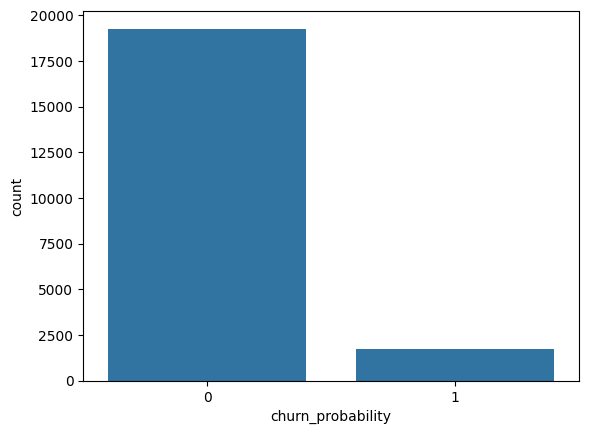

In [65]:
display(
    sb.countplot(x="churn_probability",data = data_v1_filtered)
)

# We can see that the we have the imbalanced dataset as percent of churn is quite low in compared to non churn

# Bivariate Analysis

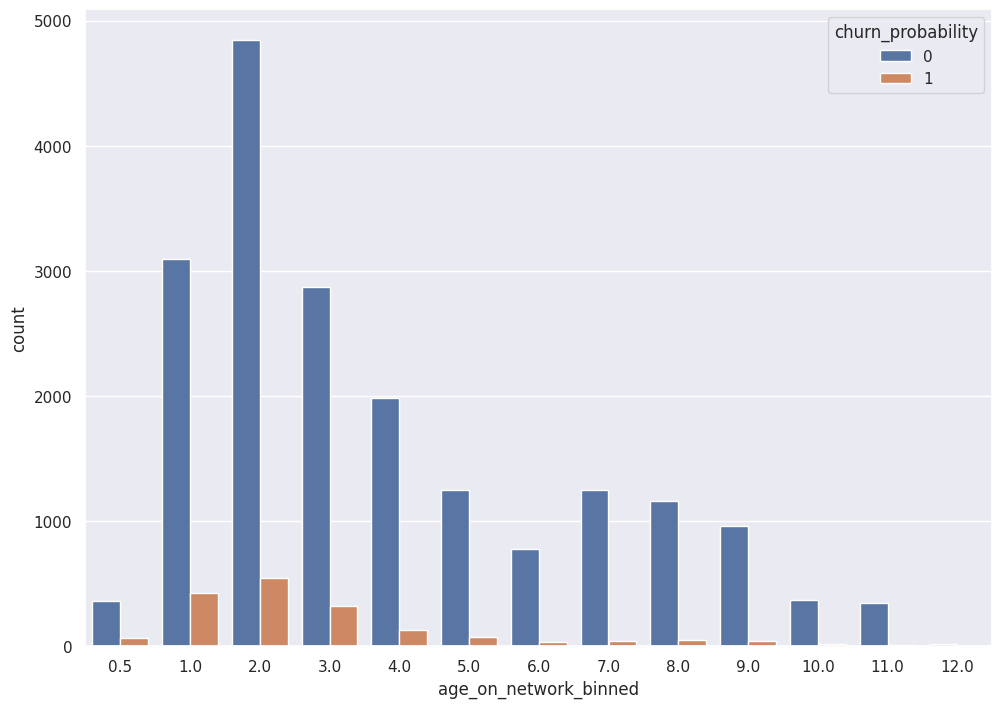

In [70]:
# Set the figure size
sb.set(rc={'figure.figsize':(11.7, 8.27)})

# Define the bins and labels
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Create a new column for 'age_on_network_binned'
data_v1_filtered['age_on_network_binned'] = pd.cut(round(((data_v1_filtered['aon'] / 30) / 12), 1), bins=bins, labels=labels)

# Plot the count plot
sb.countplot(x='age_on_network_binned', hue='churn_probability', data=data_v1_filtered)
plt.show()

In [71]:
def colbox(cols):
    plt.figure(figsize=(40, 25))
    for i in range(len(cols)):
        plt.subplot(2,len(cols),i+1)
        K = pd.concat([data_v1_filtered[cols[i]],data_v1_filtered['churn_probability']], axis=1)
        K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = K)
        plt.xticks()    
        plt.suptitle('Incoming Calls Usage')
        plt.subplot(2,3,3+i+1)
        sb.distplot(data[cols[i]])

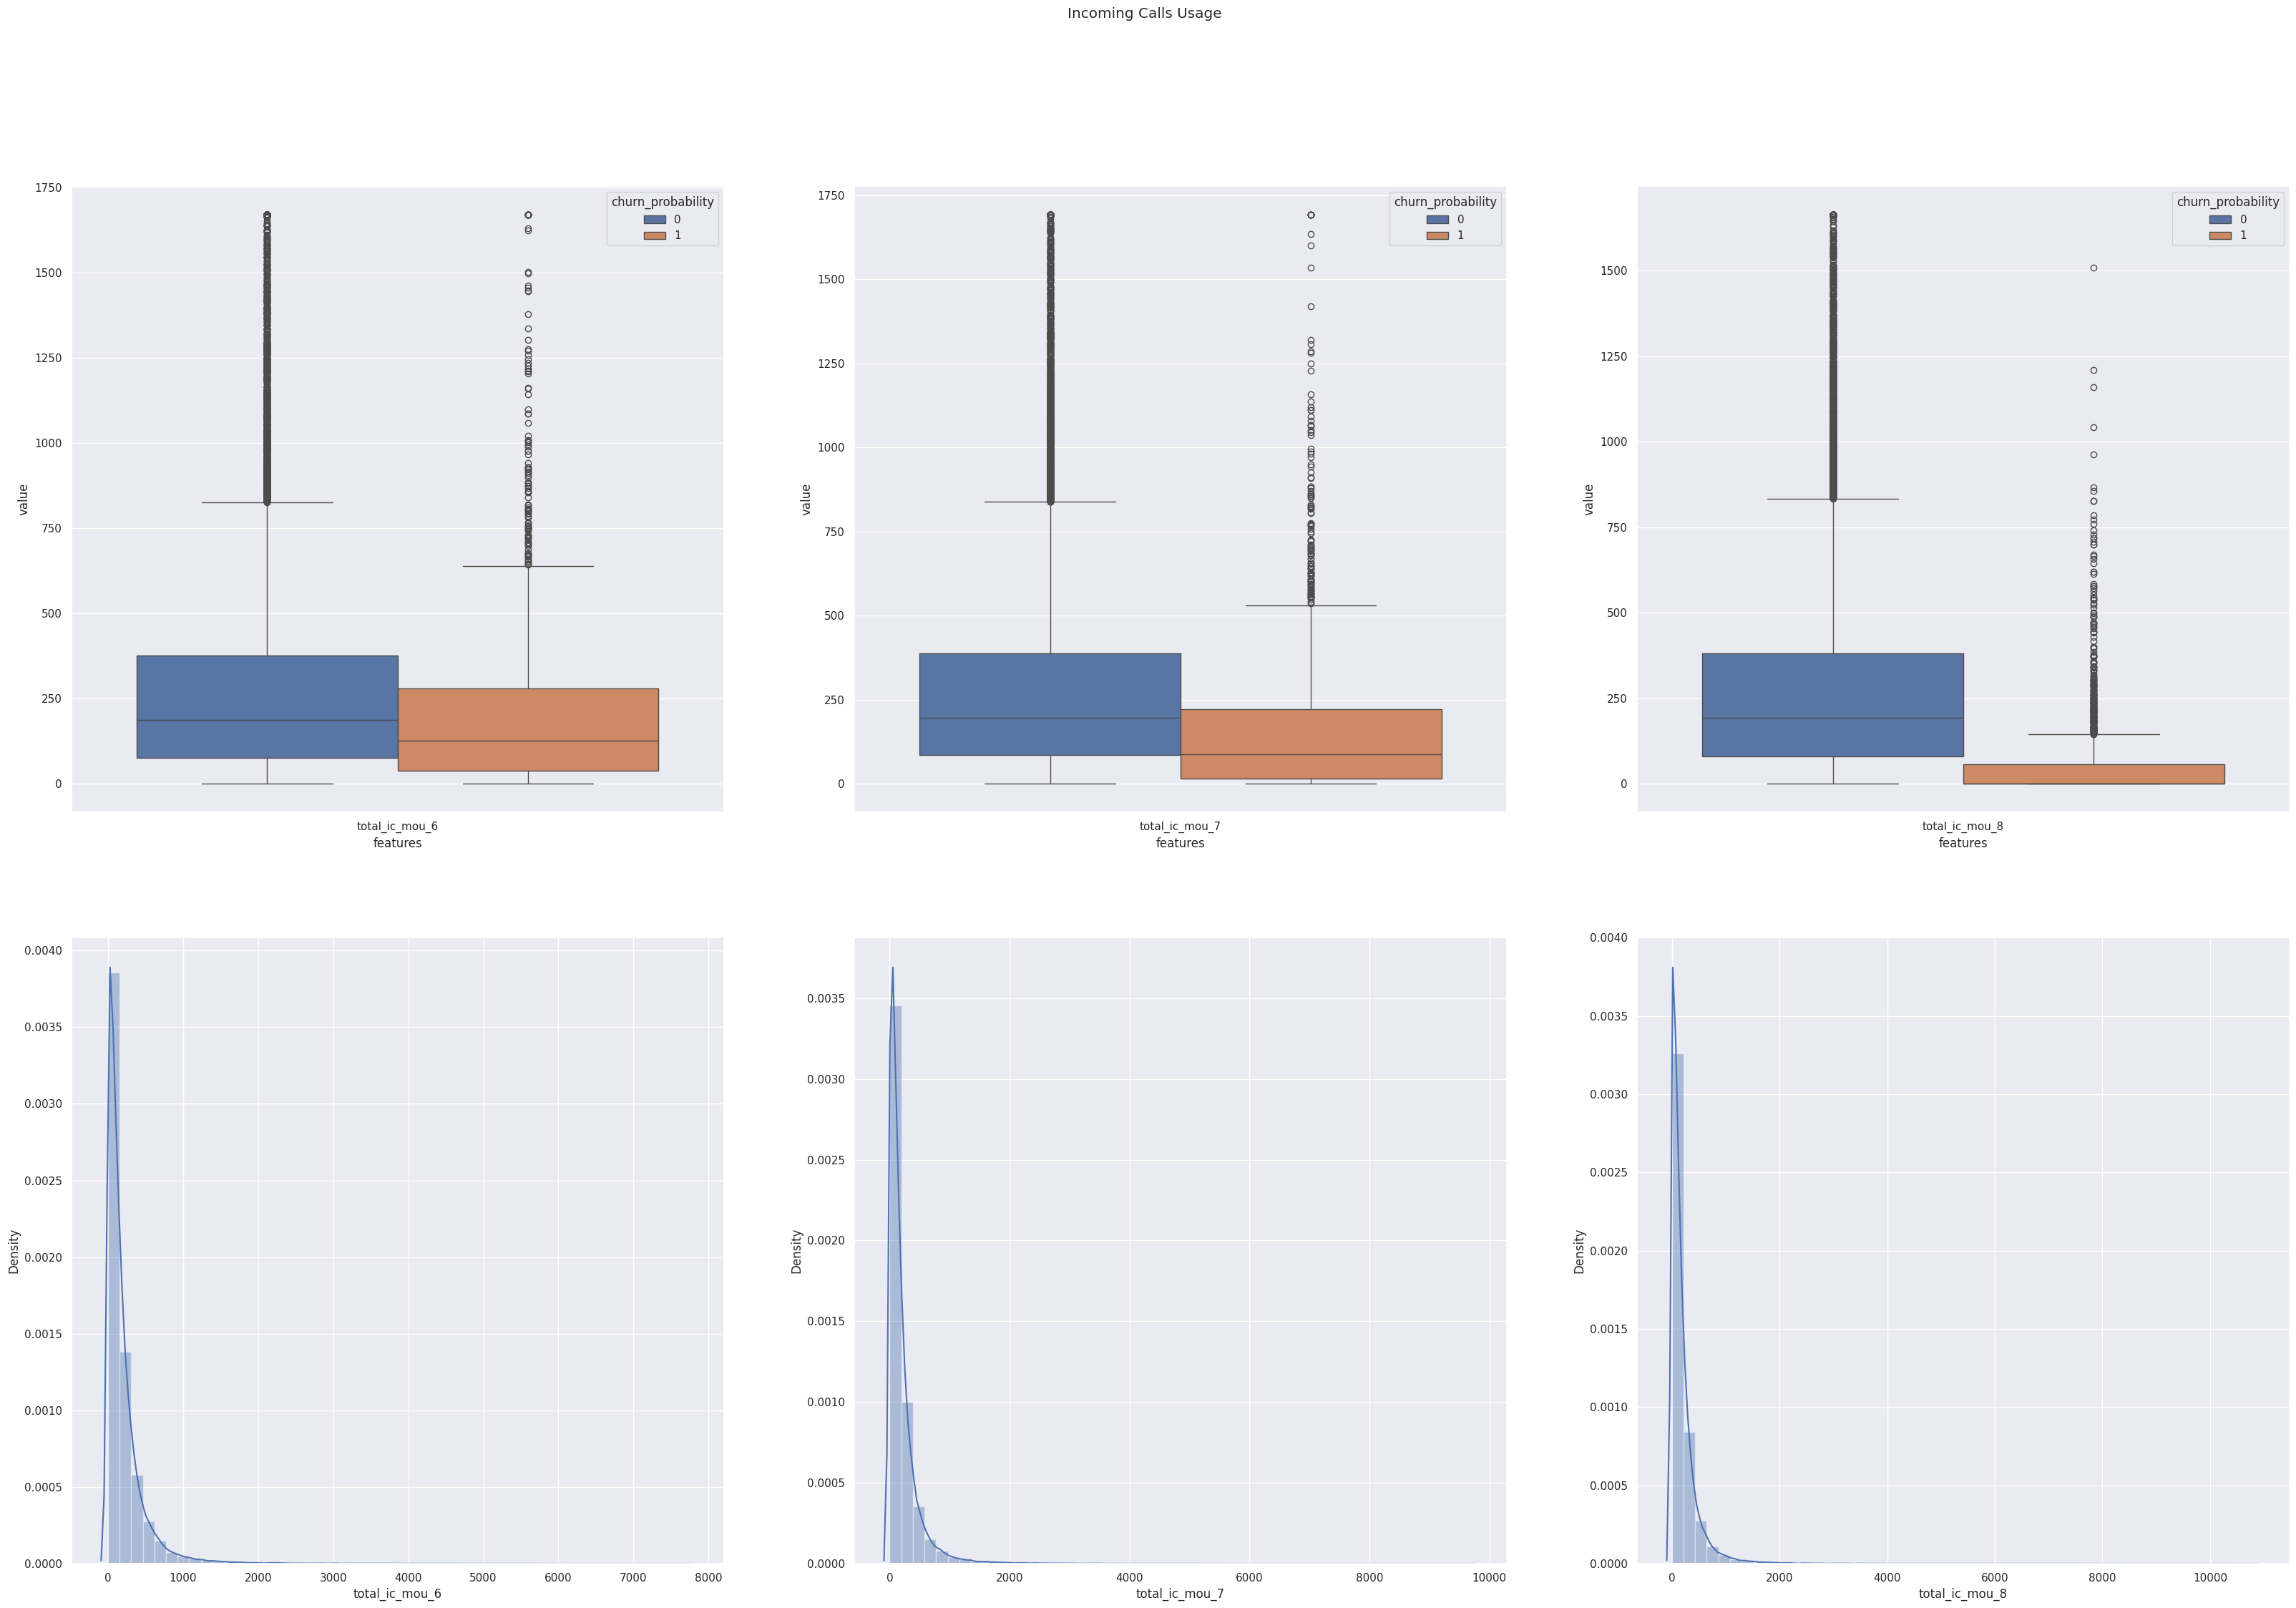

In [72]:
# Analysis : Incoming Minutes of Usage 
cols =["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"]
colbox(cols)

# Inference : Total Minutes of usage for Incoming calls are skewed to left side 

# if the total MOU is more the probability of getting churned is less

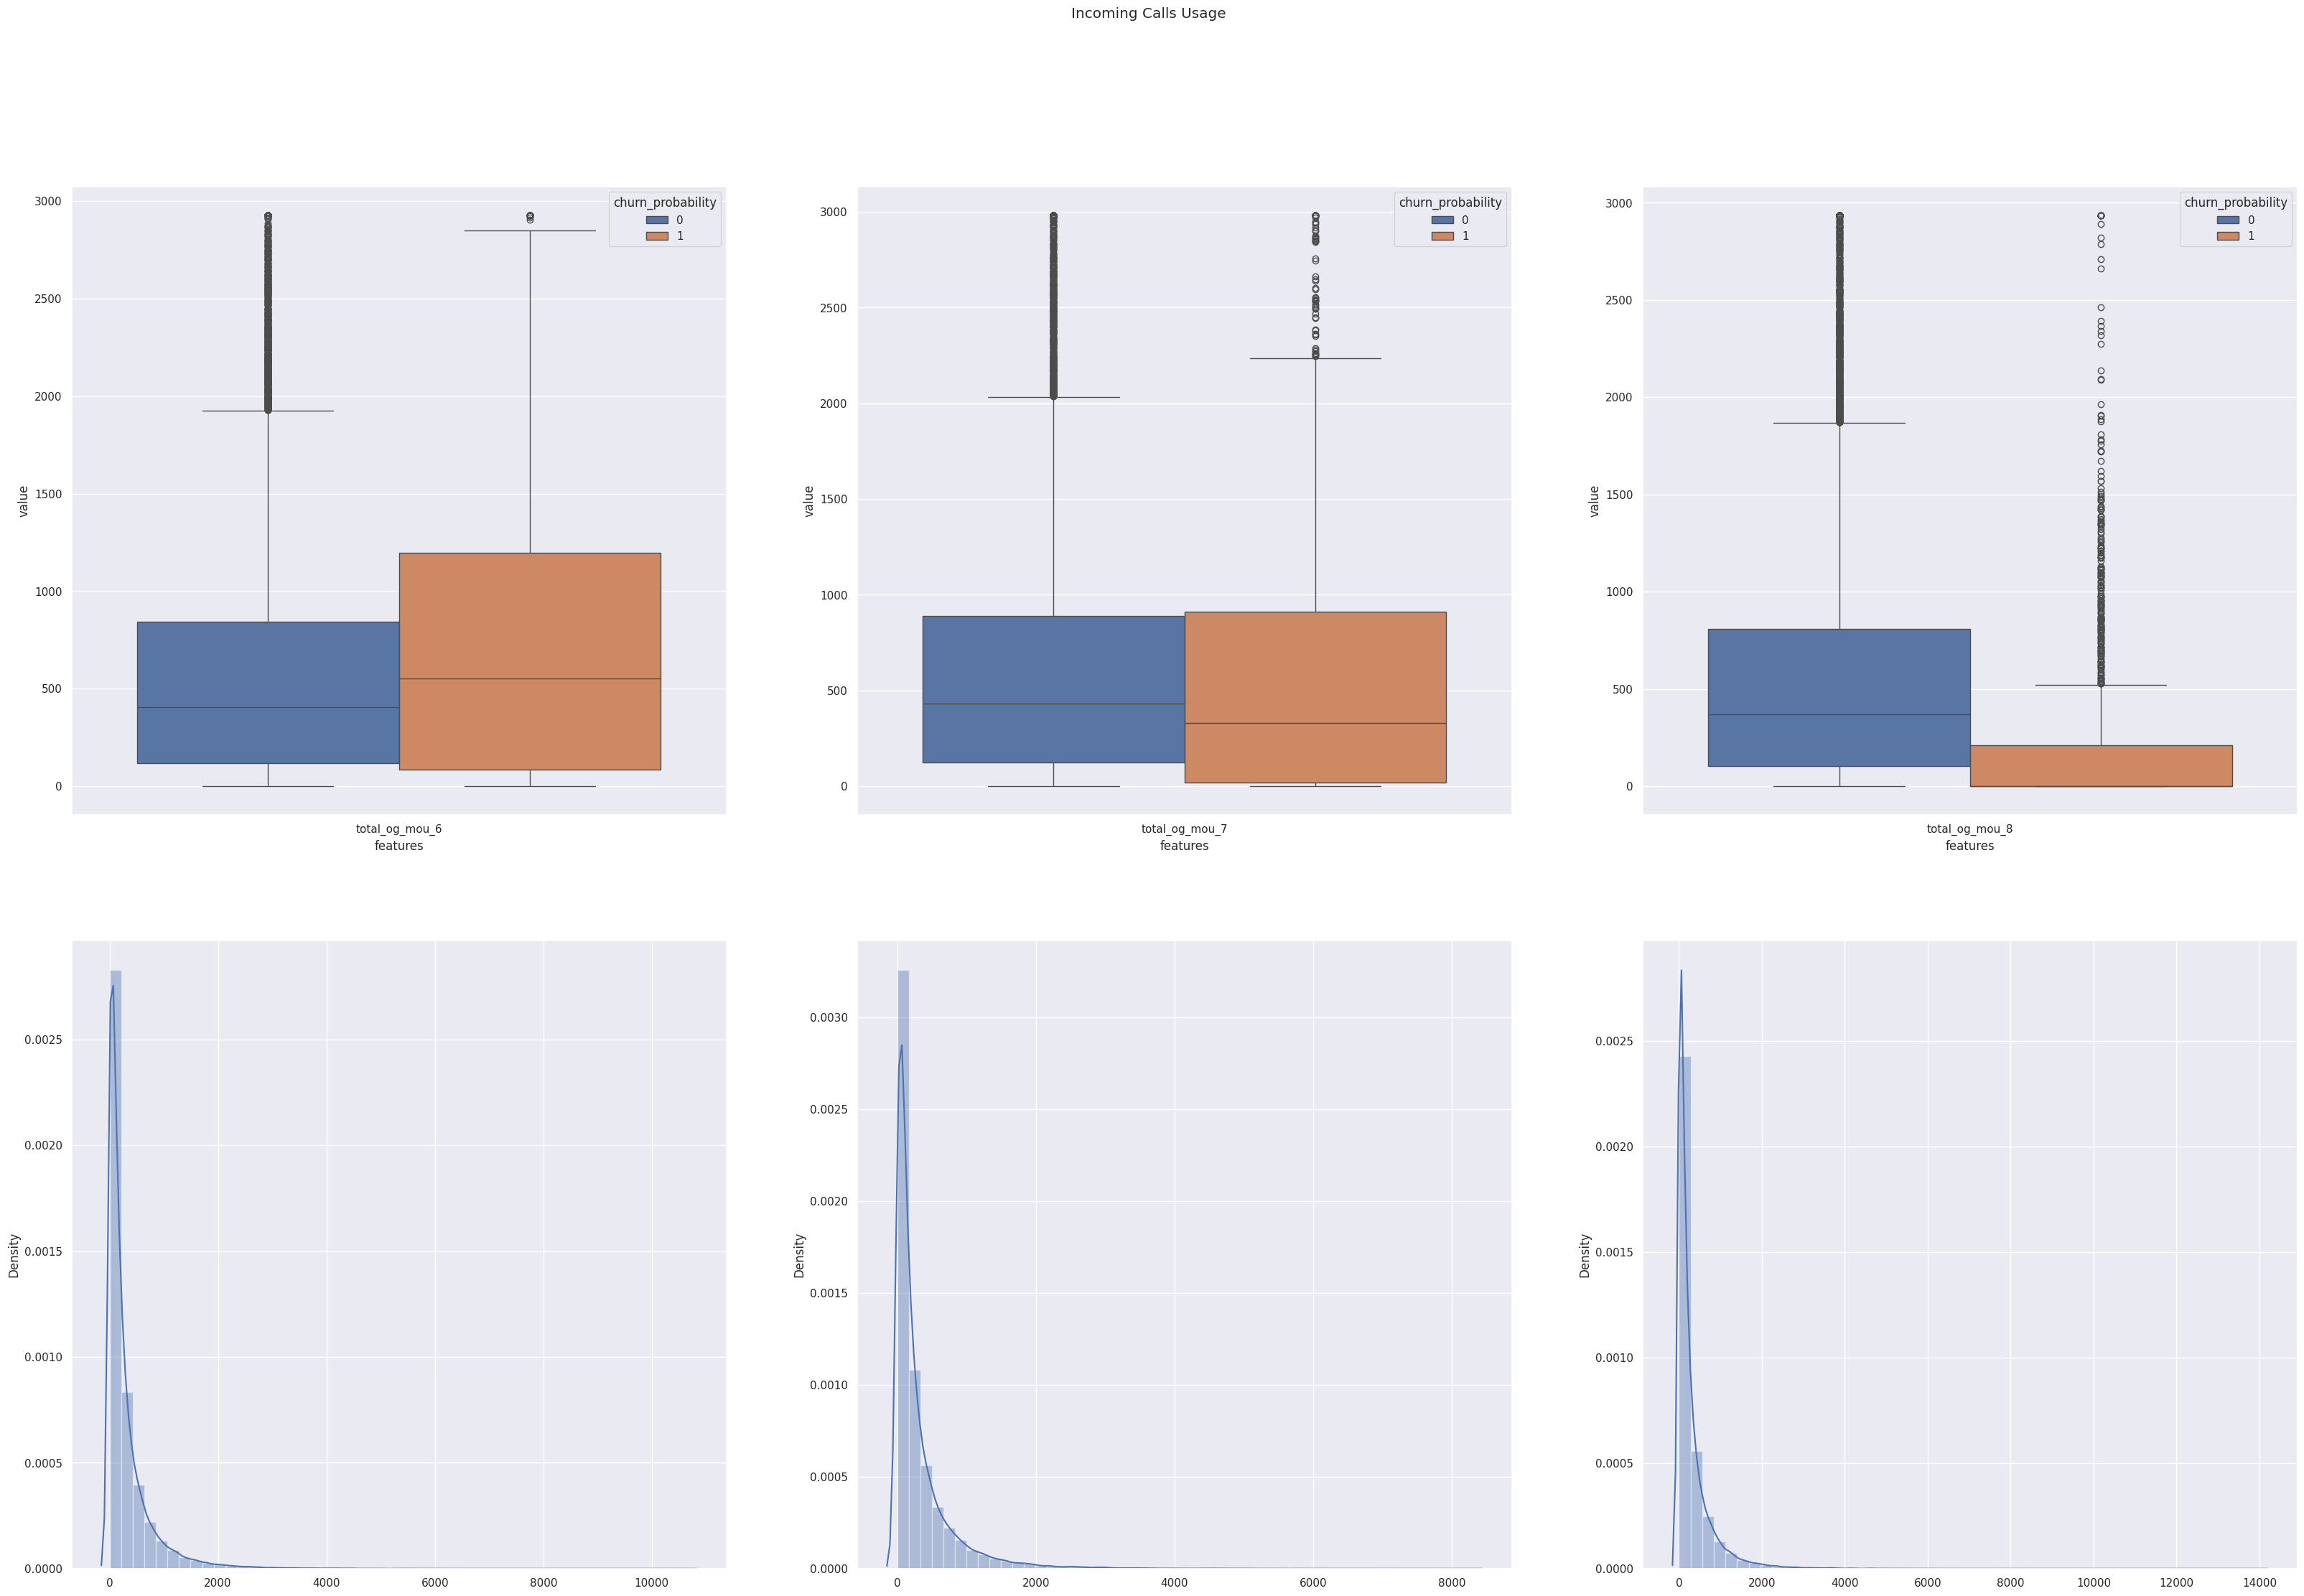

In [73]:
# Analysis : Outgoing Minutes of Usage 
cols = [['total_og_mou_6'],
        ['total_og_mou_7'],
        ['total_og_mou_8']]
colbox(cols)

# If the amount of outgoing is increase can see for june and july month the amount of churn is relatively more

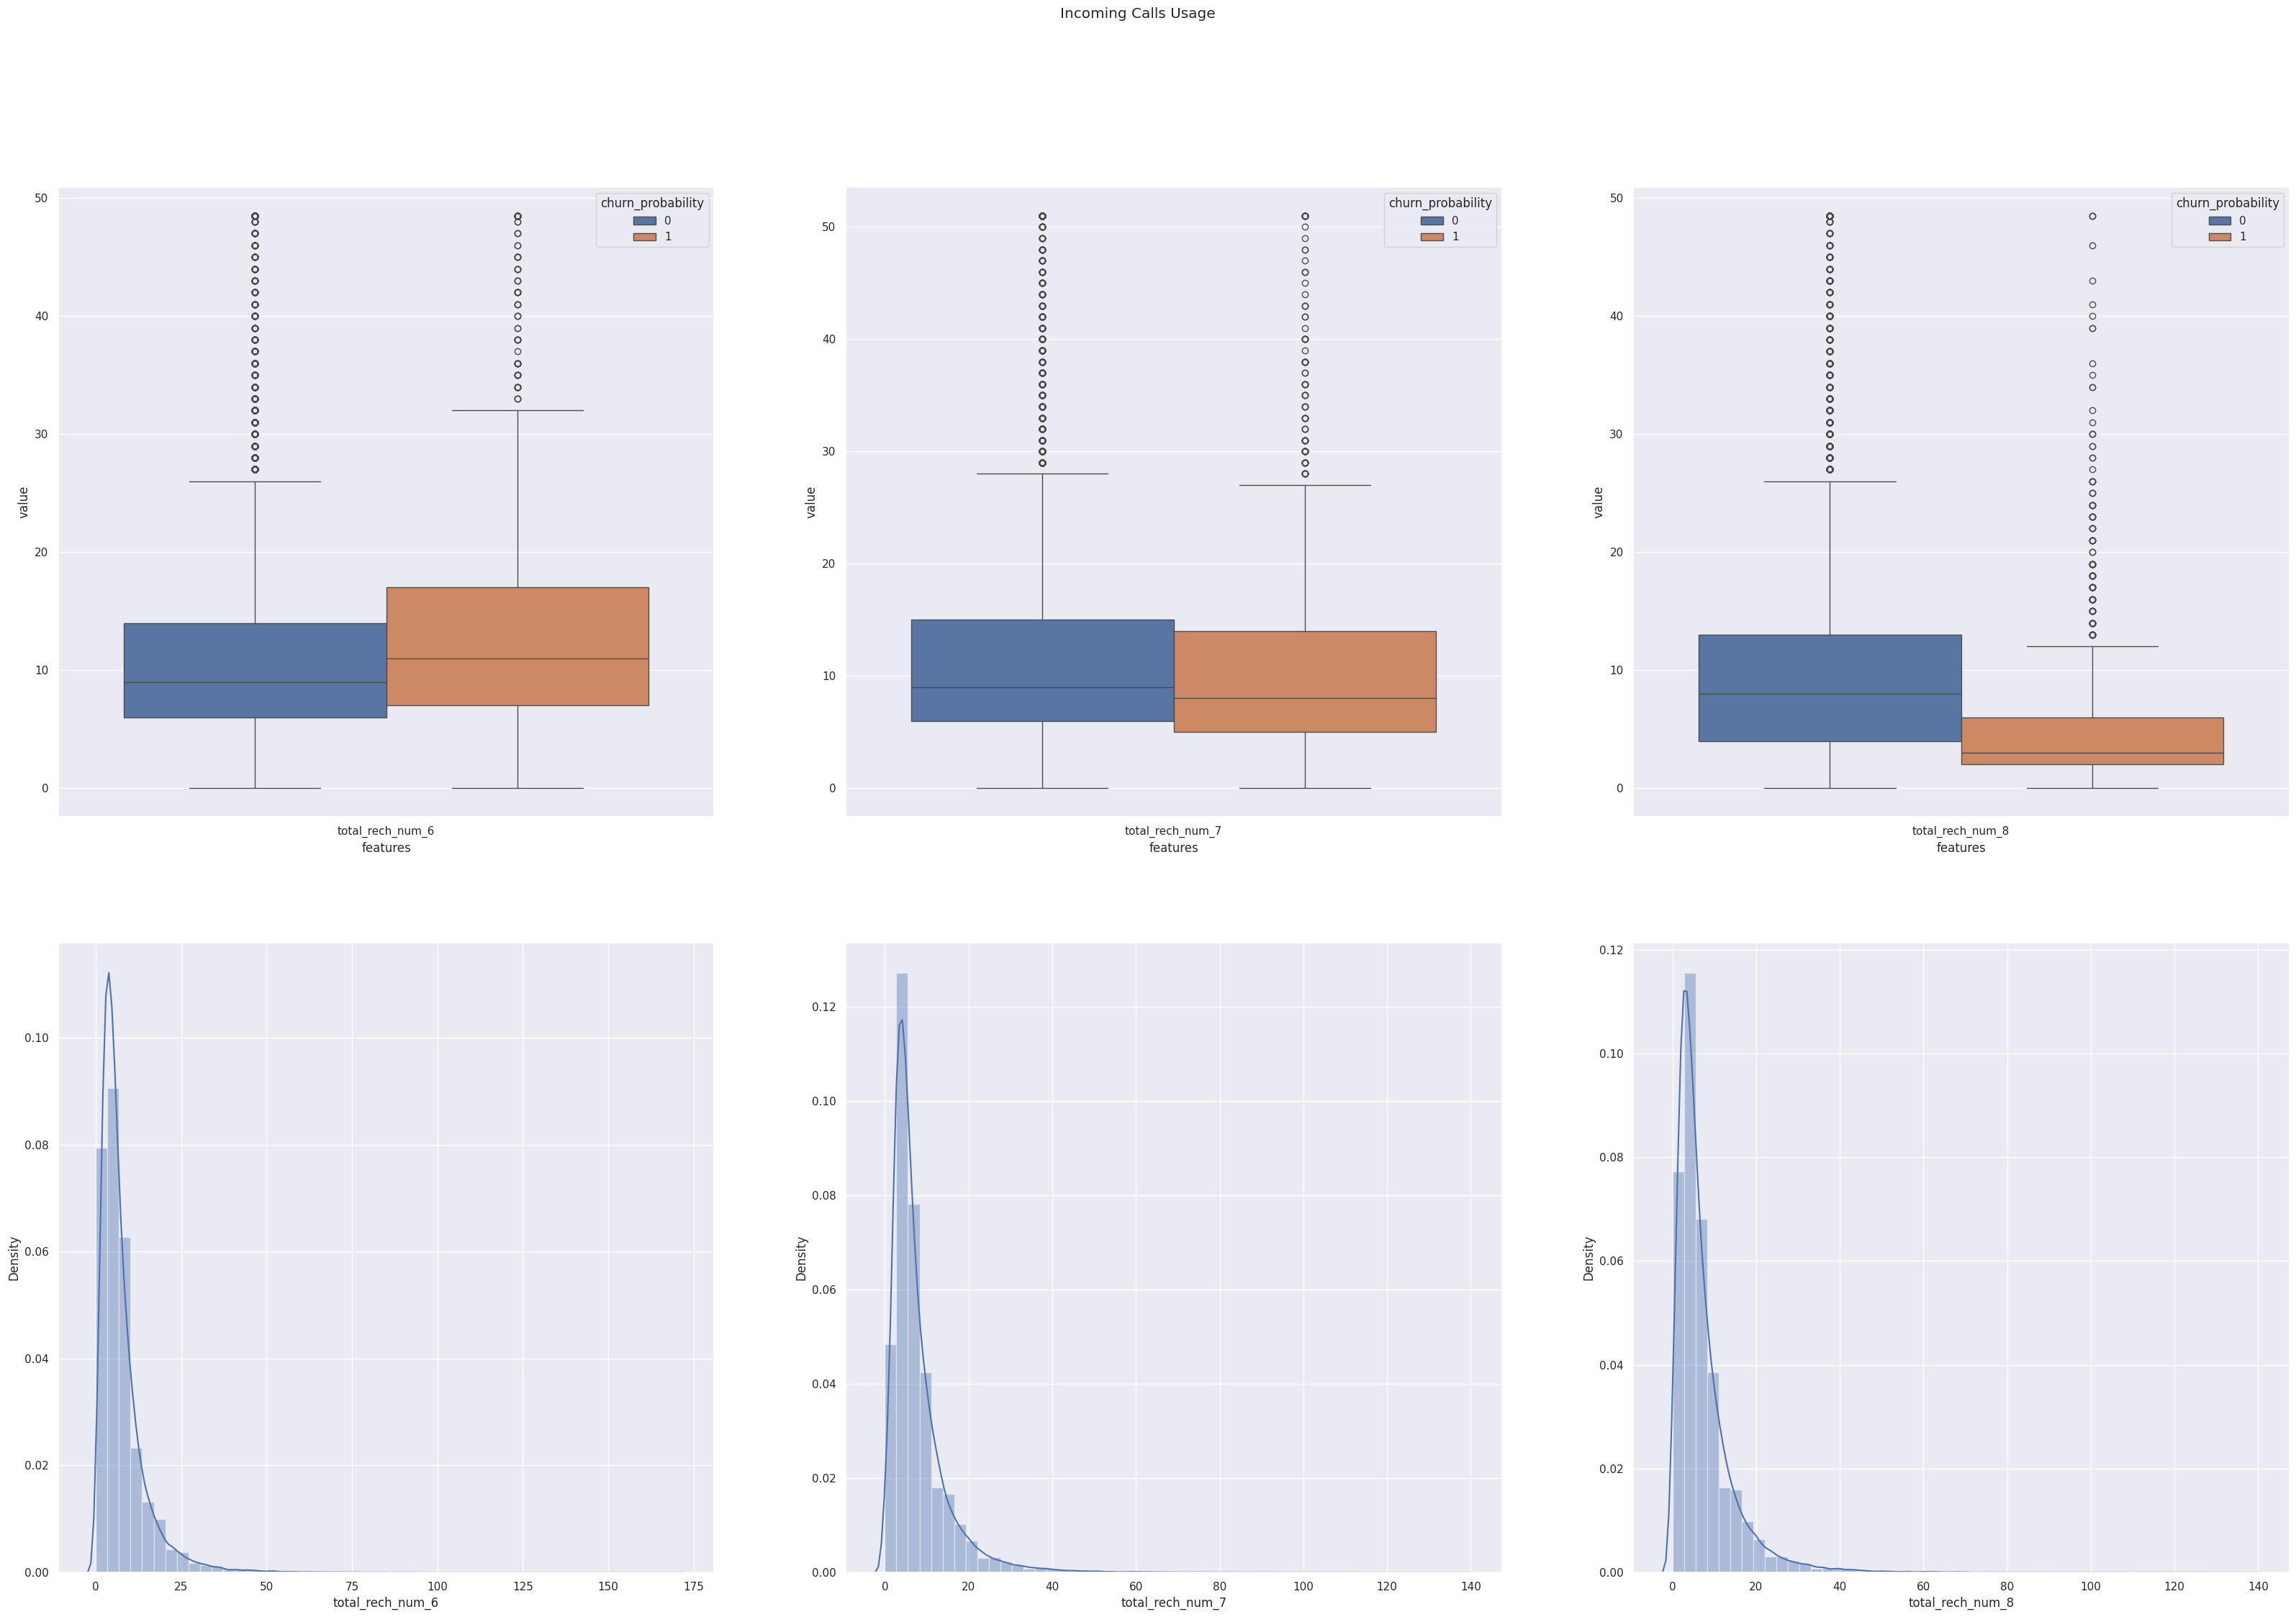

In [74]:
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
colbox(cols)

# Total Recharge Number Analysis 

# Can see for June month with the increase in total rechage number we had observed for more churn 


In [75]:
def Bivariate_box(cols):
    plt.figure(figsize=(60, 45))
    for i in range(0,7):
        plt.subplot(3,3,i+1)
        K = pd.concat([data_v1_filtered[cols[i]],data_v1_filtered['churn_probability']], axis=1)
        K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = K)
        plt.xticks()    
        plt.suptitle('2G-3G Volume')

In [76]:
def filter_columns(data_frame, prefix): 
    columns_with_prefix = []
    for col in data_frame.columns.tolist():
        if prefix in col: 
            columns_with_prefix.append(col) 
    return columns_with_prefix

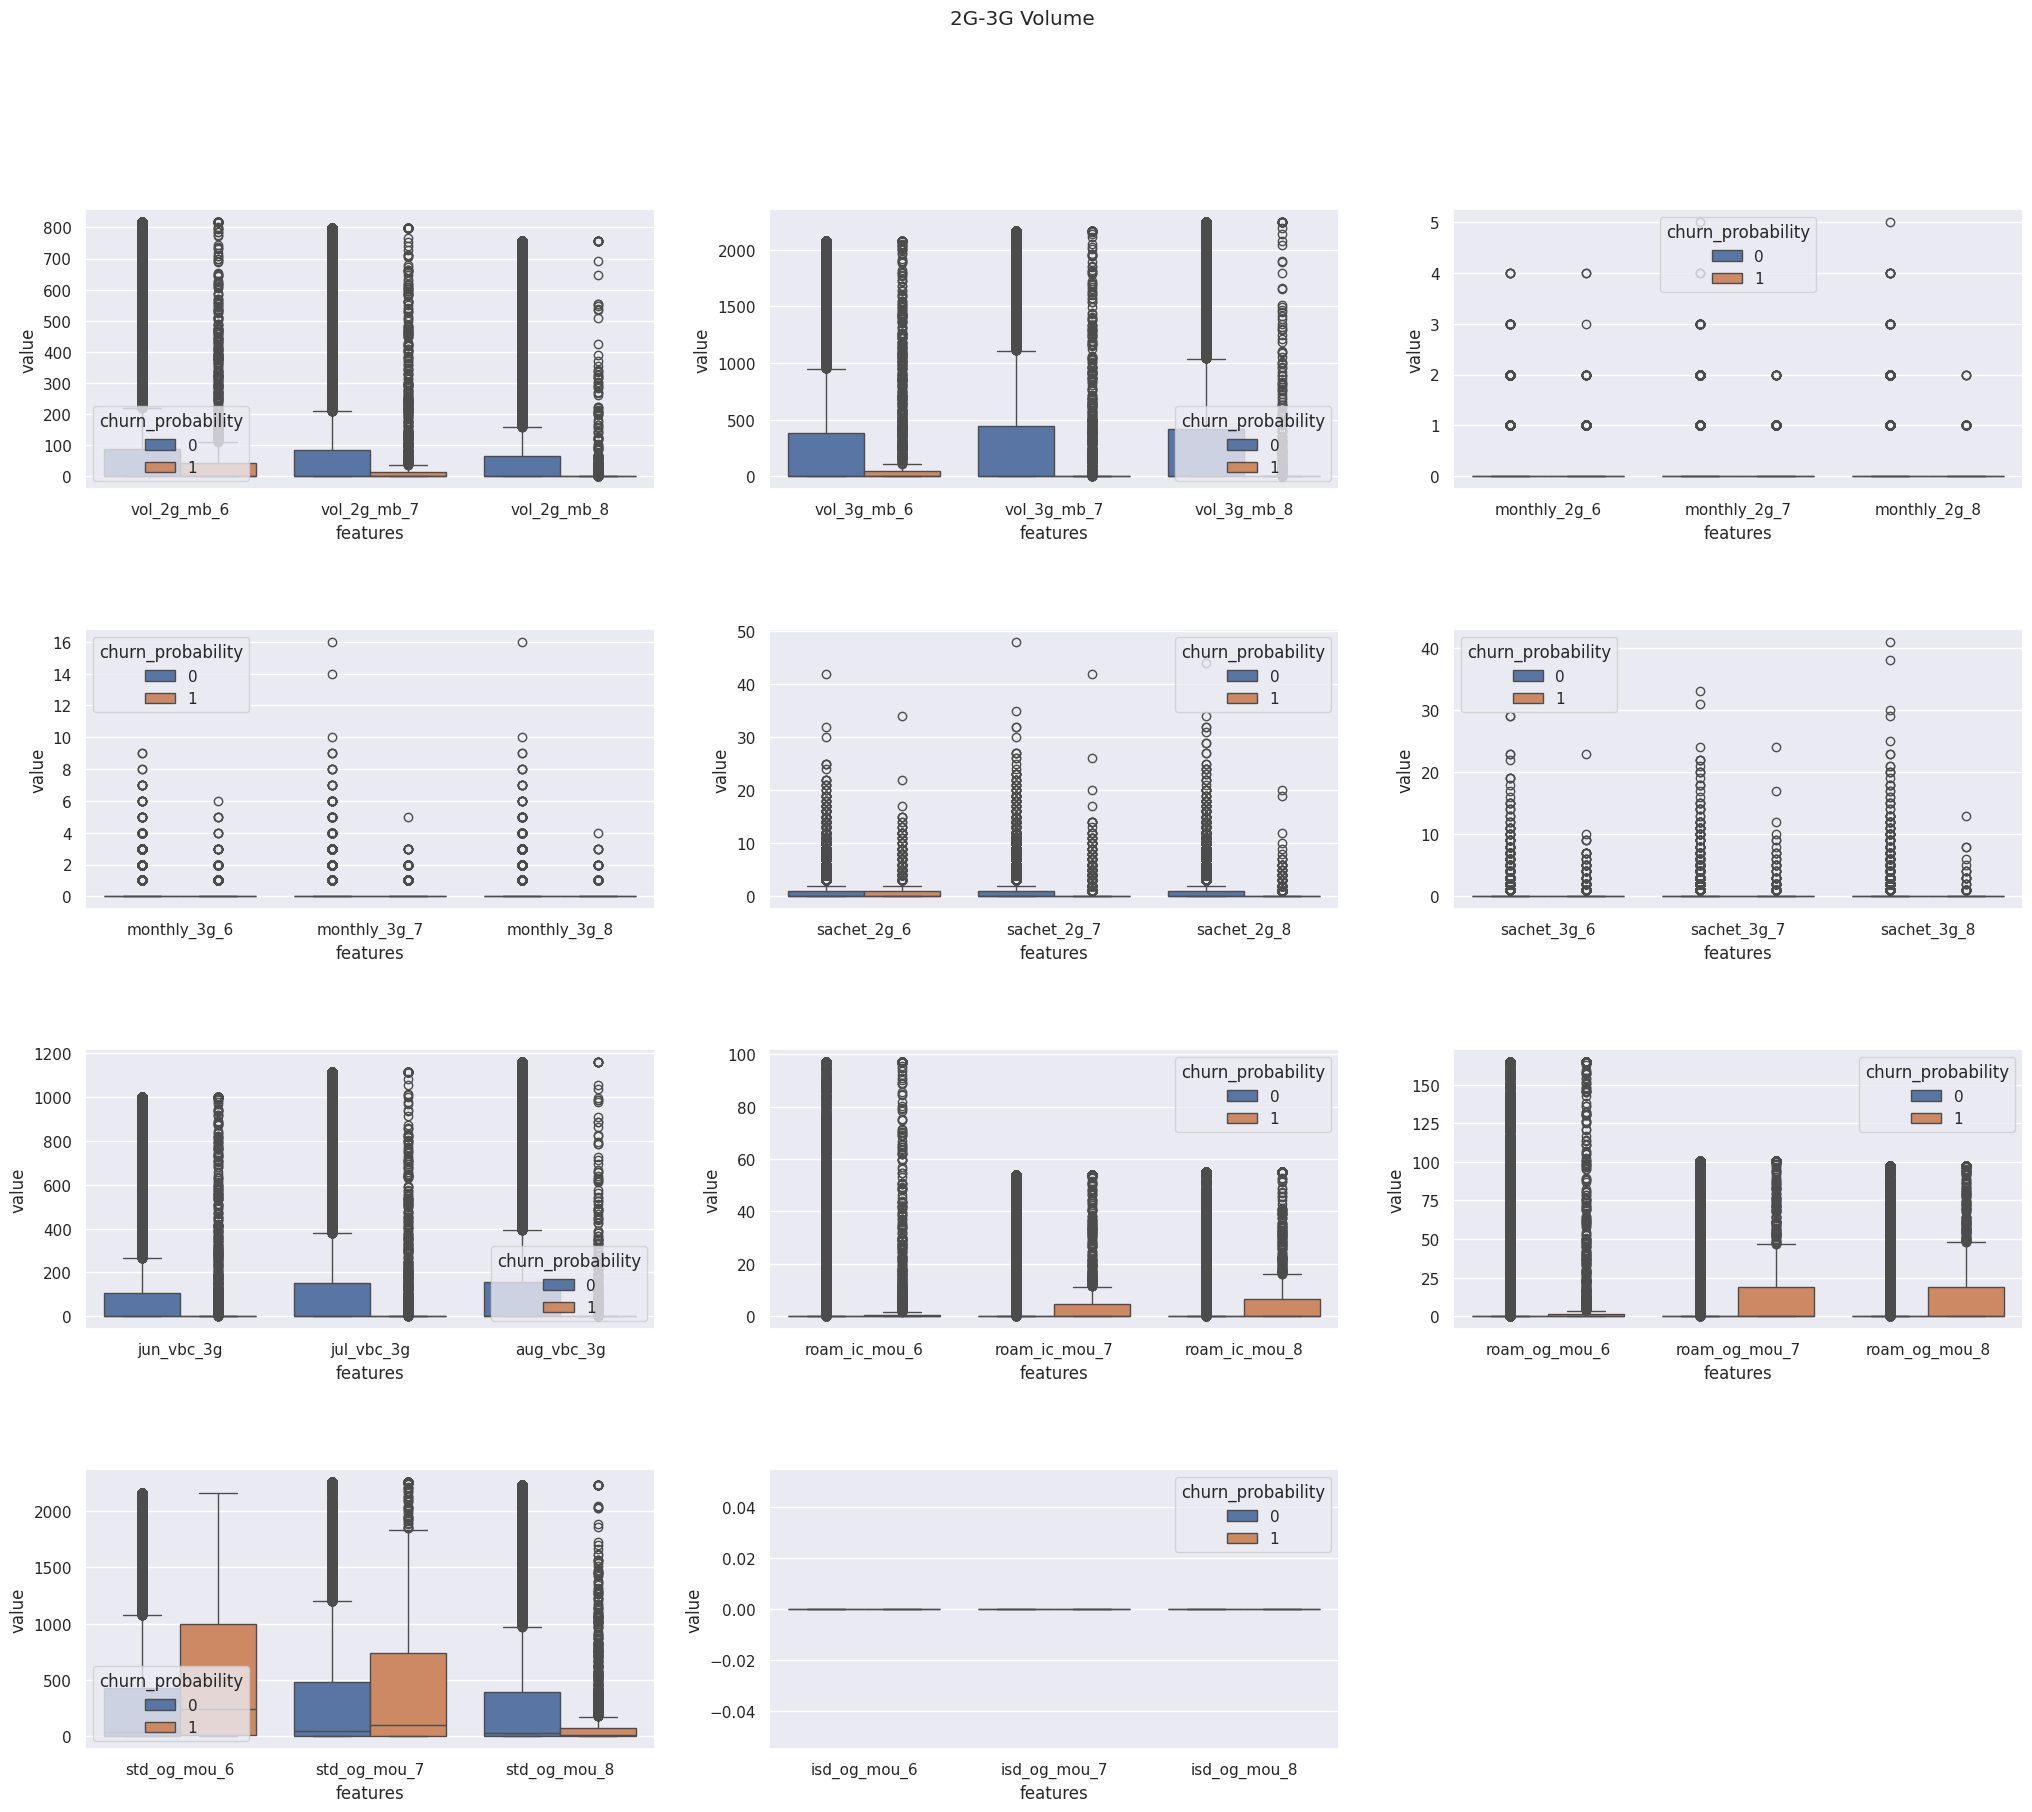

In [77]:
# WIth the increase in roaming churn is increasing
# With the increase outgoing std churn is more
cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g'],
        ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],
        ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],
        ['std_og_mou_6','std_og_mou_7','std_og_mou_8'],
        ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
       ]
# plot for the 2g-3g volume
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
for i in range(0,11):
    plt.subplot(4,3,i+1)
    K = pd.concat([data_v1_filtered[cols[i]], data_v1_filtered['churn_probability']], axis=1)
    K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
    sb.boxplot(x="features", y="value", hue="churn_probability", data=K)
    plt.xticks()    
    plt.suptitle('2G-3G Volume')

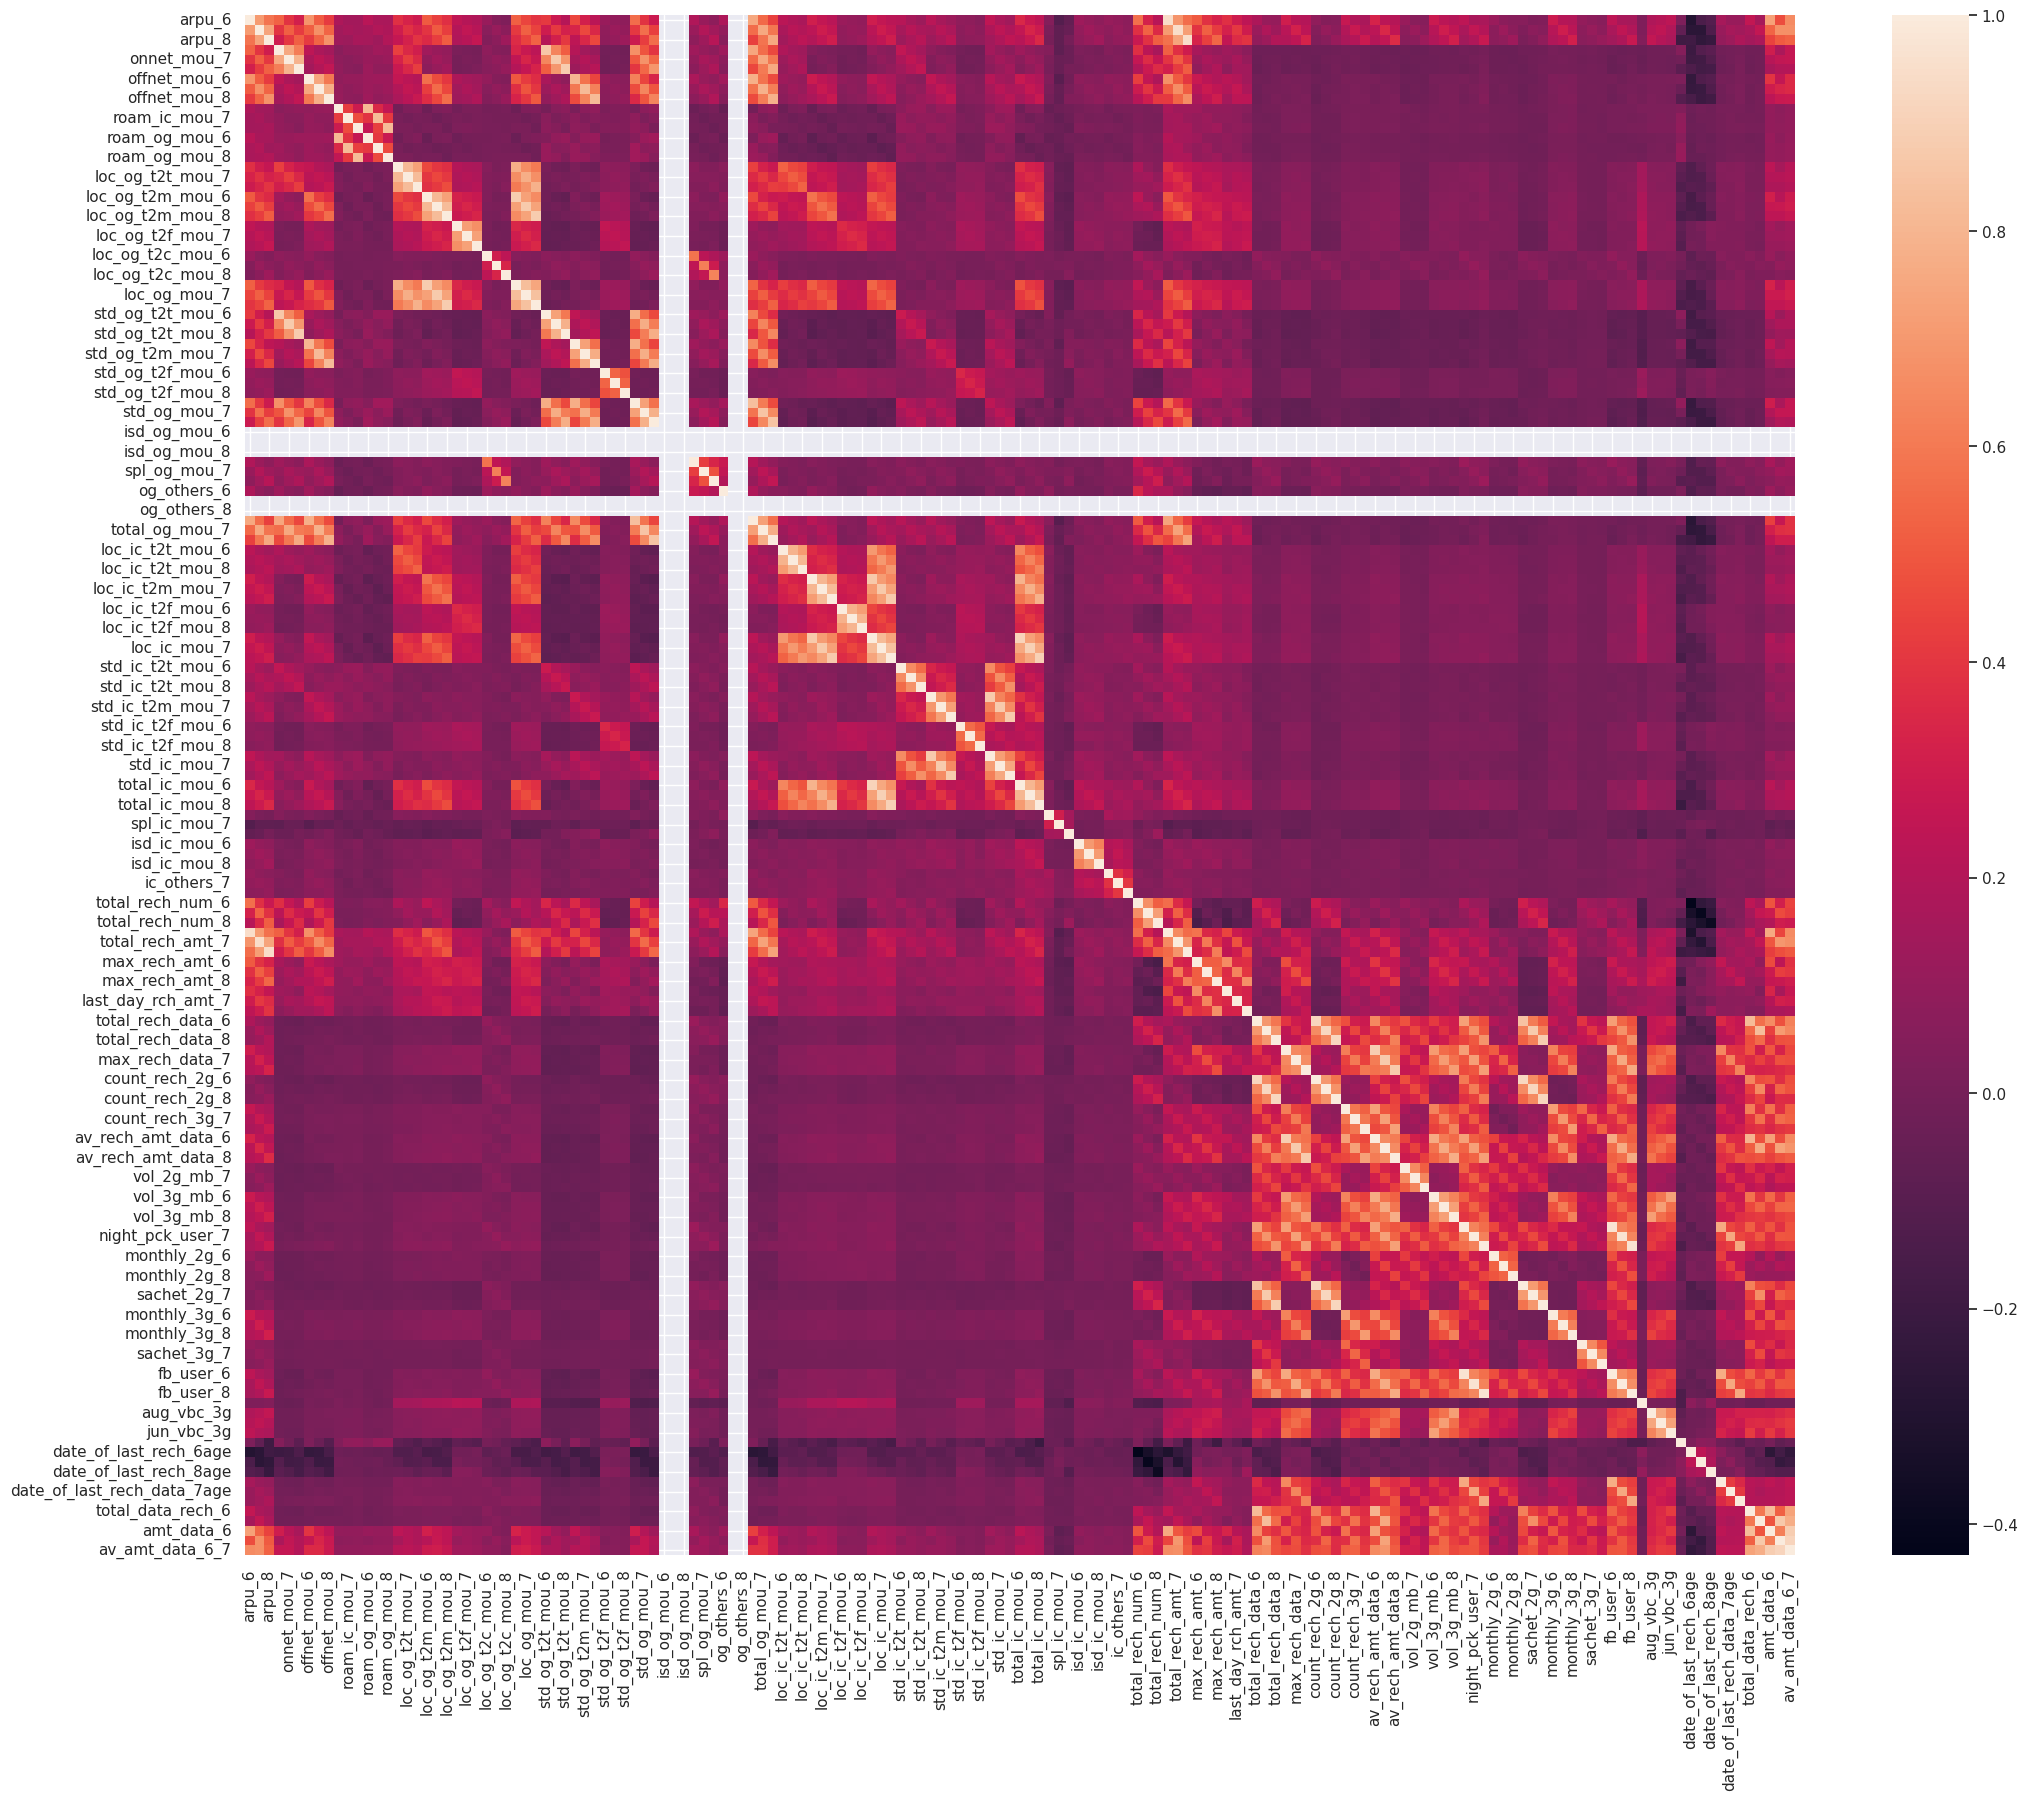

In [78]:
#Correlation Matrix

#Most of the features are highly correlated so we need to use PCA to handly multicollinearity and dimensionality reductions
plt.figure(figsize = (25, 20))

sb.heatmap(data_v1.corr())

plt.show()

In [80]:
#Spliting testing and training data 

X = data_v1_filtered.drop(["churn_probability"],axis=1)
Y = data_v1_filtered.churn_probability

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

In [82]:
# Aggregating the Categorical Columns

train = pd.concat([xtrain, ytrain], axis=1)

# aggregate the categorical variables
display(train.groupby('night_pck_user_6').churn_probability.mean())
display(train.groupby('night_pck_user_7').churn_probability.mean())
display(train.groupby('night_pck_user_8').churn_probability.mean())
display(train.groupby('fb_user_6').churn_probability.mean())
display(train.groupby('fb_user_7').churn_probability.mean())
display(train.groupby('fb_user_8').churn_probability.mean())

# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.107529, 0: 0.084044, 1: 0.127596},
           'night_pck_user_7' : {-1: 0.114231, 0: 0.065649, 1: 0.068750},
           'night_pck_user_8' : {-1: 0.126636, 0: 0.032644, 1: 0.034602},
           'fb_user_6'        : {-1: 0.107529, 0: 0.105496, 1: 0.083258},
           'fb_user_7'        : {-1: 0.114231, 0: 0.087029, 1: 0.063630},
           'fb_user_8'        : {-1: 0.126636, 0: 0.062458, 1: 0.029049}
          }
xtrain.replace(mapping, inplace = True)
xtest.replace(mapping, inplace = True)

night_pck_user_6
-1.0    0.098598
 0.0    0.068796
 1.0    0.113990
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.114313
 0.0    0.058338
 1.0    0.061538
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.142836
 0.0    0.030319
 1.0    0.023952
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.098598
 0.0    0.087838
 1.0    0.068459
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.114313
 0.0    0.068217
 1.0    0.057590
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.142836
 0.0    0.070238
 1.0    0.025385
Name: churn_probability, dtype: float64

In [83]:
data_v1_filtered.shape

(21009, 176)

# Principal Component Analysis

In [84]:
round(100*data_v1_filtered['churn_probability'].value_counts()/len(data_v1_filtered.index),2)

churn_probability
0    91.73
1     8.27
Name: count, dtype: float64

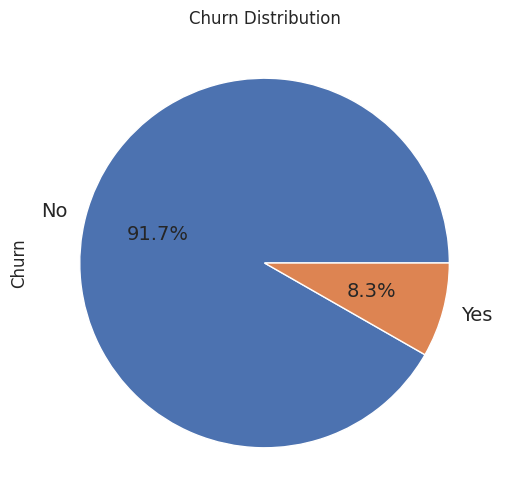

In [85]:
#Churn Distribution
pie_chart = data_v1_filtered['churn_probability'].value_counts()*100.0 /len(data_v1_filtered)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

# Data Scaling

In [88]:
# Scaling the data - Using Standard Scaler
col = list(xtrain.columns)
# Data Scaling
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
test_v1_scaled = scaler.transform(test_v1)

# Applying Principal Component Analysis
pca = PCA()
pca.fit(xtrain)
xtrain_pca = pca.fit_transform(xtrain_scaled)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age_on_network_binned


# PCA

In [ ]:
#  feature variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("PCA Components")
plt.show()

In [ ]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# 75 variables are enough to describe 95 % of the variance in the dataset hence selecting 75 variables for our modelling

# Handling imbalance dataset using Smote 

In [ ]:
display("Applying SMOTE to normalize imbalance ")
import imblearn
smote = imblearn.over_sampling.SMOTE(.8)
x_smote,y_smote = smote.fit_sample(xtrain_scaled,ytrain)
display("Shape of train datatset after SMOTE : "+ str(x_smote.shape))

# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=75)    
x_train_smote_pca = pca.fit_transform(x_smote)
x_test_smote_pca = pca.transform(xtest_scaled)
test_v1_scaled_pca = pca.transform(test_v1_scaled)


In [ ]:
display("Shape of train datatset after PCA : "+str(x_train_smote_pca.shape))

# After Smote the Shape of train datatset after PCA : (27040, 75)

In [ ]:
x_test_smote_pca.shape

In [ ]:
from collections import Counter

display(Counter(ytrain))
display(Counter(y_smote))

# Function to Evaluate metrics`m

In [ ]:
def evaluate_model(dt_classifier,ytrain,ytest,xtrain,xtest):
    display("Train Accuracy :", accuracy_score(ytrain, dt_classifier.predict(xtrain)))
    display("Train Confusion Matrix:")
    display(confusion_matrix(ytrain, dt_classifier.predict(xtrain)))
    display("-"*50)
    display("Test Accuracy :", accuracy_score(ytest, dt_classifier.predict(xtest)))
    display("Test Confusion Matrix:")
    display(confusion_matrix(ytest, dt_classifier.predict(xtest)))
    display("recall_score",round(metrics.recall_score(ytest,dt_classifier.predict(xtest)),2))
    display("precision_score",round(metrics.precision_score(ytest,dt_classifier.predict(xtest)),2))
    display("auc",round(metrics.roc_auc_score(ytest,dt_classifier.predict(xtest)),2))
    display("f1",round(metrics.f1_score(ytest,dt_classifier.predict(xtest)),2))
    sensitivity, specificity, _ = sensitivity_specificity_support(ytest, dt_classifier.predict(xtest), average='binary')
    display("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Model Creation 

## Model 1 : Logistic Regression Without hyperparameter tuning

In [ ]:
# Logistic Regression without Hyper Parameter Turning

#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(x_train_smote_pca,y_smote)
#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test_smote_pca)[:,1]
display("Logistic Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(ytest, pred_probs_test)))
evaluate_model(lr,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

## Model 2 : Logistic Regression With hyperparameter tuning

In [ ]:
# Logistic Regression with Hyper Parameter Turning

logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
lrmodel = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
lrmodel.fit(x_train_smote_pca, y_smote)

# display best hyperparameters
display("Best AUC: ", lrmodel.best_score_)
display("Best hyperparameters: ", lrmodel.best_params_)

evaluate_model(lrmodel,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

##  Inferences : Logistic Regression before tuning its giving 89 % accurancy and after tuning it is giving 92 % accuracy 


# Model 3 : Random Forest without hyperparameter tuning

In [ ]:
# Random Forest

rfc = RandomForestClassifier()
rfc.fit(x_train_smote_pca,y_smote)


evaluate_model(rfc,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

In [ ]:
# Tuning 1 - Random Forest Classifier

# run a random forest model on train data
max_features = int(round(np.sqrt(xtrain.shape[1])))    # number of variables to consider to split each node
display(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

rf_model.fit(x_train_smote_pca, y_smote)

display("OOB Score",rf_model.oob_score_)

evaluate_model(rfc,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

# Random Forest with Hyper Parameter Tuning

In [ ]:
# Tuning 2 - Random Forest Classifier - Max Depth

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': range(2, 40, 5)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

In [ ]:
evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

In [ ]:
for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# From the above plot max depth can be12 or 18 since after 18 graph become constant

In [ ]:
# Tuning 3 - Random Forest Classifier - parameters = {'n_estimators': range(100, 2000, 200)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'n_estimators': range(100, 800, 200)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# n_estimators seems to be constant lets take 200

In [ ]:
# Tuning 4 - Random Forest Classifier - parameters = {'max_features': [20,30,40,50,60]}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_features': [20,30,40,50,60]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Lets take max features as 40 since after this graph started declining

In [ ]:
# Tuning 5 - Random Forest Classifier - parameters = {'min_samples_leaf': range(1, 100, 10)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'min_samples_leaf': range(1, 100, 10)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model may start to overfit accuracy is decreasing with min sample leaf lets take it 20

In [ ]:
# Tuning 6 - Random Forest Classifier - parameters = {'min_samples_split': range(10, 100, 10)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'min_samples_split': range(10, 100, 10)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# take min_samples_split as 40 after this plot start decreasing

In [ ]:
# Tuning 6 - Random Forest Classifier - parameters = # Final Model after all the tuning

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [12],
    'min_samples_split' : [40],
    'min_samples_leaf' : [10,20],
    'max_features' : [40],
    'n_estimators' : [200]
}

rf_final_model = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
rf_final_model.fit(x_train_smote_pca, y_smote)

evaluate_model(rf_final_model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(rf_final_model.cv_results_)


# Inference Random Forest Model - This is the best that we got from random forest after hyperparameter tuning 

> Train Accuracy : 94.1 

> Test Accuracy : 89.0 , Recall : 0.79 and precision 0.42

# MODEL 4 : ADABOOST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(x_train_smote_pca, y_smote)

In [ ]:
display('Accuracy of the Train model is:  ',accuracy_score(y_smote, adaboost.predict(x_train_smote_pca)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(x_test_smote_pca)))

In [ ]:
evaluate_model(adaboost,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

# Model 5 : ADABOOST : xtrain and y train directly without using PCA

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(xtrain, ytrain)

In [ ]:
display('Accuracy of the Train model is:  ',accuracy_score(ytrain, adaboost.predict(xtrain)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(xtest)))

In [ ]:
evaluate_model(adaboost,ytrain,ytest,xtrain,xtest)

In [ ]:
# Hyperparameter Tuning Adaboost
params = {
        'n_estimators' : [50,100, 200], # no of trees   # eta
        'algorithm': ['SAMME', 'SAMME.R'],
        }

folds = 5

param_comb = 800

random_search_ada = RandomizedSearchCV(adaboost, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search_ada.fit(xtrain, ytrain)

In [ ]:
display('Accuracy of the Train model is:  ',accuracy_score(ytrain, random_search_ada.predict(xtrain)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, random_search_ada.predict(xtest)))

In [ ]:
evaluate_model(random_search_ada,ytrain,ytest,xtrain,xtest)

In [ ]:
display('\n Best estimator:')
display(random_search_ada.best_estimator_)
display('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
display(random_search_ada.best_score_ )
display('\n Best hyperparameters:')
display(random_search_ada.best_params_)

# Best Accuracy that we got from adaboost is 94% on train and 93.9 % percent on test data with recall score of 52 % and precision score of 71 %

# XGBBOOST

In [ ]:
### XG Boost - Model 1 
# fit model on training data with default hyperparameters

model = XGBClassifier()
model.fit(x_train_smote_pca, y_smote)
evaluate_model(model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

# Lets Fine tune the model for improved accuracy

In [ ]:
# hyperparameter tuning with XGBoost - Model 2

# creating a KFold object 
folds = 5

# 'min_child_weight': [1, 5, 7, 10],
# 'gamma': [0.1, 0.5, 1, 1.5, 5]
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train_smote_pca, y_smote)
evaluate_model(model_cv,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

In [ ]:
# displaying the optimal accuracy score and hyperparameters
display('We  get best score of '+str(round(model_cv.best_score_,2)) +'using parameters`m '+str(model_cv.best_params_))

In [ ]:
# chosen hyperparameters - Model 3
params = {'learning_rate': 0.3,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.4,
          'gamma': 1,
         'objective':'binary:logistic'}

# fit model on training data
model_1 = XGBClassifier(params = params,max_depth=2, n_estimators=200,min_child_weight=1,scale_pos_weight = 1)
model_1.fit(x_train_smote_pca, y_smote)
evaluate_model(model_1,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

In [ ]:
## Kaggle_CSV 

# XGBBOOST is giving good accuracy and recall score as compared to others but instead of using one model

# We will be using combination of Multiple models

## Derive output of all models and predict test data based on the combination

# XGBOOST

In [ ]:
test_v1.shape

In [ ]:
# XGBOOOST
churn_probability_model1 = model_1.predict(test_v1_scaled_pca)
csvdata = {'id':test['id'],'churn_probability_xgboost':churn_probability_model1}
df = pd.DataFrame(csvdata)
display(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



In [ ]:
df['churn_probability_xgboost'].value_counts()

# Logistic Regression

In [ ]:
# Logistic Regression
churn_probability_logistic = lrmodel.predict(test_v1_scaled_pca)
df['churn_probability_logistic'] = pd.DataFrame(churn_probability_logistic,columns=['churn_probability_logistic'])
display(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



In [ ]:
df['churn_probability_logistic'].value_counts()

# Random Forest

In [ ]:
# Logistic Regression
churn_probability_randomforest = rf_final_model.predict(test_v1_scaled_pca)
df['churn_probability_randomforest'] = pd.DataFrame(churn_probability_randomforest,columns=['churn_probability_randomforest'])
display(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



In [ ]:
df['churn_probability_randomforest'].value_counts()

In [ ]:
test_v1.shape

In [ ]:
df.head()

# Adaboost

In [ ]:
# Adaboost
churn_probability_adaboost = random_search_ada.predict(test_v1)
df['churn_probability_adaboost'] = pd.DataFrame(churn_probability_adaboost,columns=['churn_probability_adaboost'])
display(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)



In [ ]:
df.head()

In [ ]:
df['churn_probability_adaboost'].value_counts()

In [ ]:
df['total_churn'] = df['churn_probability_xgboost'] + df['churn_probability_adaboost'] + df['churn_probability_randomforest']

In [ ]:
df['Total_Case1'] = df['total_churn'].apply(lambda x : 1 if x>1 else 0)

In [ ]:
df['Total_Case1'].value_counts()

In [ ]:
# df[['id','churn_probability']].to_csv('final_model.csv',index=False)

> # In order to improve further accuracy lets build another set of models on train data directly instead of spliting 
- we will again use these models in linear combination

# Apply Algorithms on X and Y train directly

In [ ]:
trainX = X.copy()
trainY = Y.copy()

display(trainX.shape,trainY.shape)

In [ ]:
# Aggregating the Categorical Columns

Dtrain = pd.concat([trainX, trainY], axis=1)

# aggregate the categorical variables
display(Dtrain.groupby('night_pck_user_6').churn_probability.mean())
display(Dtrain.groupby('night_pck_user_7').churn_probability.mean())
display(Dtrain.groupby('night_pck_user_8').churn_probability.mean())
display(Dtrain.groupby('fb_user_6').churn_probability.mean())
display(Dtrain.groupby('fb_user_7').churn_probability.mean())
display(Dtrain.groupby('fb_user_8').churn_probability.mean())



In [ ]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099925, 0: 0.067941, 1: 0.109091},
           'night_pck_user_7' : {-1: 0.116903, 0: 0.056424, 1: 0.062500},
           'night_pck_user_8' : {-1: 0.142189, 0: 0.030350, 1: 0.029412},
           'fb_user_6'        : {-1: 0.099925, 0: 0.080432, 1: 0.068025},
           'fb_user_7'        : {-1: 0.116903, 0: 0.070099, 1: 0.055439},
           'fb_user_8'        : {-1: 0.142189, 0: 0.076923, 1: 0.024883}
          }
trainX.replace(mapping, inplace = True)

In [ ]:
#Scaling on entire set 

# Scaling the data - Using Standard Scaler
col = list(trainX.columns)
# Data Scaling
scaler1 = StandardScaler()
trainX_scaled = scaler1.fit_transform(trainX)
testX_v1_scaled = scaler1.transform(test_v1)

# Applying Principal Component Analysis
pca = PCA()
pca.fit(trainX)
trainx_pca = pca.fit_transform(trainX_scaled)

# PCA

In [ ]:
#  feature variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("no of pca components")
plt.show()

In [ ]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Handling imbalance dataset using Smote 

In [ ]:
display("Applying SMOTE to normalize imbalance ")

smote = SMOTE(.8)
trainX_smote,trainY_smote = smote.fit_sample(trainX_scaled,trainY)
display("Shape of train datatset after SMOTE : "+ str(trainX_smote.shape))

# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=80)    
trainX_smote_pca = pca.fit_transform(trainX_smote)
testX_v1_scaled_pca = pca.transform(testX_v1_scaled)

In [ ]:
display("Shape of train datatset after PCA : "+str(trainX_smote_pca.shape))
from collections import Counter

display(Counter(trainY))
display(Counter(trainY_smote))

In [ ]:
from sklearn.model_selection import KFold

# RandomForest

In [ ]:
# Random Forest Classifier - parameters = # No Splited Column

cv = KFold(n_splits=4, shuffle=True, random_state=1)

Drf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [12],
    'min_samples_split' : [40],
    'min_samples_leaf' : [10,20],
    'max_features' : [40],
    'n_estimators' : [200]
}

Drf_final_model = GridSearchCV(estimator=Drf,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
Drf_final_model.fit(trainX_smote_pca, trainY_smote)

scores = pd.DataFrame(Drf_final_model.cv_results_)



In [ ]:
display("Train Accuracy :", accuracy_score(trainY_smote, Drf_final_model.predict(trainX_smote_pca)))
display("Train Confusion Matrix:")
display(confusion_matrix(trainY_smote, Drf_final_model.predict(trainX_smote_pca)))

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#Using adaBoosting to predict 'Attrition' 
Dadaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
Dadaboost.fit(trainX, trainY)

In [ ]:
display('Accuracy of the Train model is:  ',accuracy_score(trainY, Dadaboost.predict(trainX)))

In [ ]:
# Hyperparameter Tuning Adaboost
params = {
        'n_estimators' : [50,100, 200], # no of trees   # eta
        'algorithm': ['SAMME', 'SAMME.R'],
        }

cv = KFold(n_splits=5, shuffle=True, random_state=1)

param_comb = 800

Drandom_search_ada = RandomizedSearchCV(Dadaboost, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=cv, verbose=3, random_state=42)
Drandom_search_ada.fit(trainX, trainY)

In [ ]:
display('Accuracy of the Train model is:  ',accuracy_score(trainY, Drandom_search_ada.predict(trainX)))

# XGBOOST

In [ ]:
### XG Boost - Model initial 
# fit model on training data with default hyperparameters

xgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1,learning_rate=.3,subsample=.5)
xgb_model.fit(trainX_scaled, trainY)
# importances = pd.DataFrame(data={
#     'Attribute': X_train.columns,
#     'Importance': model.feature_importances_
# })
# importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
# hyperparameter tuning with XGBoost - Model Direct

# creating a KFold object 
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# 'min_child_weight': [1, 5, 7, 10],
# 'gamma': [0.1, 0.5, 1, 1.5, 5]
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
Dxgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
Dmodel_cv = GridSearchCV(estimator = Dxgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

# fit the model
Dmodel_cv.fit(trainX_smote_pca, trainY_smote)



In [ ]:
# displaying the optimal accuracy score and hyperparameters
display('We  get best score of '+str(round(Dmodel_cv.best_score_,2)) +'using parameters`m '+str(Dmodel_cv.best_params_))

In [ ]:
# chosen hyperparameters - Model 3
params = {'learning_rate': 0.3,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.4,
          'gamma': 1,
         'objective':'binary:logistic'}

# fit model on training data
Dmodel_1 = XGBClassifier(params = params,max_depth=2, n_estimators=200,min_child_weight=1,scale_pos_weight = 1)
Dmodel_1.fit(trainX_smote_pca, trainY_smote)

display('Accuracy of the Train model is:  ',accuracy_score(trainY_smote, Dmodel_1.predict(trainX_smote_pca)))

# Calculate the Test Results based on the multiple model outputs

In [ ]:
# Random Forest 
Dchurn_probability_randomforest = Drf_final_model.predict(testX_v1_scaled_pca)
df['Dchurn_probability_randomforest'] = pd.DataFrame(Dchurn_probability_randomforest,columns=['Dchurn_probability_randomforest'])
display(df.shape)


In [ ]:
# XGBOOST 
Dchurn_XGBOOST = Dmodel_1.predict(testX_v1_scaled_pca)
df['Dchurn_XGBOOST'] = pd.DataFrame(Dchurn_XGBOOST,columns=['Dchurn_XGBOOST'])
display(df.shape)

In [ ]:
#ADABOOST
# Adaboost
Dchurn_probability_adaboost = random_search_ada.predict(test_v1)
df['Dchurn_probability_adaboost'] = pd.DataFrame(Dchurn_probability_adaboost,columns=['Dchurn_probability_adaboost'])
display(df.shape)
#df[['id','churn_probability_xgboost']].to_csv('samplechurn_model1.csv',index=False)

In [ ]:
df.head()

In [ ]:
df['Dtotal_churn'] = df['Dchurn_XGBOOST'] + df['Dchurn_probability_adaboost'] + df['Dchurn_probability_randomforest']

In [ ]:
df['Total_Case2'] = df['Dtotal_churn'].apply(lambda x : 1 if x>1 else 0)

In [ ]:
df['Total_sum'] = df['Total_Case2'] + df['Total_Case1']

In [ ]:
df['churn_probability'] = df['Total_sum'].apply(lambda x : 1 if x>=1 else 0)

In [ ]:
df['churn_probability'].value_counts()

In [ ]:
df[['id','churn_probability']].to_csv('Submission.csv',index=False)

# Feature Importance using the Xgboost Model

In [ ]:
xgb_model.feature_importances_

In [ ]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
# Scatter plot
trace = go.Scatter(
y = xgb_model.feature_importances_, x = xtrain.columns.values, mode='markers',
marker=dict(
sizemode = 'diameter',
sizeref = 1.3,
size = 12,
color = xgb_model.feature_importances_, colorscale='Portland', showscale=True
),
text = xtrain.columns.values )
data = [trace]
layout= go.Layout( autosize= True,
title= 'XGBOOST Model Feature Importance', hovermode= 'closest',
xaxis= dict( ticklen= 5,
showgrid=False, zeroline=False, showline=False
), yaxis=dict(
title= 'Feature Importance', showgrid=False, zeroline=False,
ticklen= 5,
gridwidth= 2 ),
showlegend= False )
fig = go.Figure(data=data, layout=layout) 
py.iplot(fig,filename='scatter')

In [ ]:
# Top 20 Features based on Feature Selection
#y = model_1.feature_importances_, x = xtrain.columns.values,
results = pd.DataFrame()
results['columns'] = xtrain.columns.values
results['importances'] = xgb_model.feature_importances_ *100
results.sort_values(by = 'importances', ascending = False, inplace=True)
results[:20]

# Conclusion
- Telecom company should provide good offers to the customers who are using services from a roaming zone.
- Telecom company should provide some kind of STD and ISD packages to reduce churn rate.

In [ ]:
import datetime, pytz; 
print("Current Time in IST:", datetime.datetime.now(pytz.utc).astimezone(pytz.timezone('Asia/Kolkata')).strftime('%Y-%m-%d %H:%M:%S'))